# RUNNING SHOES REVIEWS ANALYSIS - Part 1

<div class="alert alert-block alert-info">

# Index | Notebook 1
    
[1. Dataset Description & Metadata](#1)<br>
    
[2. Import Libraries](#2)<br>

[3.  Exploratory Data Analysis of the Full Dataset](#3)<br>
- [3.1 Language Detection](#3.1)<br>
    
[4.  Exploratory Data Analysis of the Ita-Fr-Eng Dataset](#4)<br>
    
[5.  Data Cleaning¶](#5)<br>
    
[6.  Features Engineering](#6)<br>
    
[7.  Patterns Exploration](#7)<br>
- [7.1 Rating Breakdown](#7.1)  
- [7.2 Patterns by Sentiment ](#7.2) 

[8.  NLP Patterns Analysis ](#8)<br>
- [8.1 Italian Dataset](#8.1) 
- [8.2 French Dataset](#8.2) 
- [8.3 English Dataset](#8.3) 

[9.  Dataset Preprocessing](#9)<br>
- [9.1 Preprocessing | Sentence BERT and HDBSCAN/BERTopic](#9.1)  
  - [9.1.1 Italian Preprocessing](#9.1.1) 
  - [9.1.2 French Preprocessing](#9.1.2) 
  - [9.1.3 English Preprocessing](#9.1.3) 



<a class="anchor" id="1">

# 1. Dataset Description & Metadata
    
</a>

The provided dataset is composed of the following 37 features:

**GENERAL PRODUCT INFORMATION**

- **Brand:** Name of the brand that produces the shoes
- **Model:** Name or model number of the shoe
- **Price:** Original price of the product without discounts
- **Discounted Price:** Price of the product after any discounts have been applied
- **Product Code:** Unique identification code assigned to the product by Decathlon

**TECHNICAL CARACTERISTICS**

- **Color:** Variant of color available for the model
- **Type Of Ground:** Type of surface for which the shoe is designed
- **Drop:** Height difference between heel and forefoot in mm
- **Waterproof:** Indicates whether the shoe is waterproof or not
- **Season:** Recommended season for use
- **Level Of Practice:** Recommended level of experience
- **Foot Width:** Width of the foot for which the shoe is suitable
- **Staccable:** Indicates whether some components of the shoe are removable
- **Circumstance Of Practice:** Ideal usage situations (e.g., Training, Race, Walking)
- **Running Intensity:** Recommended intensity of use
- **Detachable Sole:** Indicates whether the sole of the shoe is removable
- **Recommended Frequency:** Recommended frequency of use (e.g. Occasional, Regular, Intense)
- **Sole That Leaves Marks:** Indicates whether the sole leaves marks on smooth floors  
- **Main Material:** Main material of the shoe 
- **Type Of Stride:** Type of foot stance (e.g. Neutral, Pronator, Supinator) 
- **Place Of Practice:** Recommended locations for use (e.g., Road, Trails, Track) 
- **Type Of Closure:** Type of shoe closure 

**REVIEWS AND RATING**

- **Rating:** Numerical rating of the product (1-5 stars)
- **Title:** Title of the review left by the user
- **Review:** Text of the review written by the user
- **Reviewer:** Name or pseudonym of the reviewer
- **Date:** Date of the review

**SHOE PERFORMANCE**
- **Foot Movement:** Numerical rating of the freedom of movement offered by the shoe
- **Cushioning:** Numerical rating of the level of cushioning provided by the shoe
- **Lightness:** Numerical rating of the weight of the shoe and perception of lightness
- **Adherence:** Numerical rating of the level of grip and grip of the sole on different surfaces    

<a class="anchor" id="2">

# 2. Import Libraries & Datasets
    
</a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import re
import langdetect
import spacy
import ftfy
import simplemma
import gensim
import os
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from datetime import datetime, timedelta
from langdetect import detect, DetectorFactory
from gensim.models.phrases import Phrases, Phraser
from unidecode import unidecode
from spellchecker import SpellChecker
from tqdm import tqdm
from wordcloud import WordCloud
from sklearn.utils import resample
from collections import Counter
from datasets import Dataset # Hugging Face
from spacy.lang.it.stop_words import STOP_WORDS as ITALIAN_STOPWORDS
from spacy.lang.fr.stop_words import STOP_WORDS as FRENCH_STOPWORDS
from spacy.lang.en.stop_words import STOP_WORDS as ENGLISH_STOPWORDS

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giuliabovenga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/giuliabovenga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Import dataset
file_path = "/Users/giuliabovenga/Desktop/Final_Data/Decathlon_reviews_final.xlsx"
df_raw = pd.read_excel(file_path)

<a class="anchor" id="3">

# 3. Exploratory Data Analysis | Full Dataset
    
</a>

`df_raw` is the dataset used

In [3]:
df_raw.shape

(24419, 35)

In [4]:
df_raw.head()

Brand          Model       Price Discounted Price  Product Code  \
0  KALENJI  JOGFLOW 100.1  19,99¬†‚Ç¨       17,99¬†‚Ç¨     8733464.0   
1  KALENJI  JOGFLOW 100.1  19,99¬†‚Ç¨       17,99¬†‚Ç¨     8733464.0   
2  KALENJI  JOGFLOW 100.1  19,99¬†‚Ç¨       17,99¬†‚Ç¨     8733464.0   
3  KALENJI  JOGFLOW 100.1  19,99¬†‚Ç¨       17,99¬†‚Ç¨     8733464.0   
4  KALENJI  JOGFLOW 100.1  19,99¬†‚Ç¨       17,99¬†‚Ç¨     8733464.0   

                        Color    Type Of Ground  Drop        Waterproof  \
0  nero fumo / grigio argento  STRADA, Sentiero  6 mm  Non impermeabile   
1  nero fumo / grigio argento  STRADA, Sentiero  6 mm  Non impermeabile   
2  nero fumo / grigio argento  STRADA, Sentiero  6 mm  Non impermeabile   
3  nero fumo / grigio argento  STRADA, Sentiero  6 mm  Non impermeabile   
4  nero fumo / grigio argento  STRADA, Sentiero  6 mm  Non impermeabile   

          Season  ...                 Rating                   Title  \
0  Tutto l‚'anno  ...  Valutazione di 5 su 5  per correre tranquilli   
1  Tutto l‚'anno  ...  Valutazione di 4 su 5                     NaN   
2  Tutto l‚'anno  ...  Valutazione di 5 su 5                     NaN   
3  Tutto l‚'anno  ...  Valutazione di 5 su 5             comodissima   
4  Tutto l‚'anno  ...  Valutazione di 5 su 5                     NaN   

                                              Review           Reviewer  \
0  scarpe per running non troppo impegnativo, mor...    MICHELE, Italia   
1  Ottimo prodotto per rapporto qualità prezzo. C...    Antonio, Italia   
2  Una scarpa eccellente!_x000D_\nAcquisto azzecc...  Giammarco, Italia   
3                                 comode e di design    roberto, Italia   
4                                             comode    Silvano, Italia   

       Date Foot Movement Cushioning Lightness Adherence Unnamed: 34  
0  1sett fa           5.0        5.0       5.0       4.0         NaN  
1  1sett fa           4.0        4.0       5.0       4.0         NaN  
2  1sett fa           5.0        5.0       5.0       5.0         NaN  
3  1sett fa           4.0        5.0       5.0       5.0         NaN  
4  2sett fa           5.0        5.0       4.0       5.0         NaN  

[5 rows x 35 columns]

In [5]:
# Define a function to collect some basic information
def overview(df_raw):
    column = []
    dtypes = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df_raw.columns:
        column.append(item) # feature name
        dtypes.append(df_raw[item].dtype) # data type
        unique.append(len(df_raw[item].unique())) # how many unique values in the feature
        missing.append(df_raw[item].isna().sum()) # amount of missing values
        pc_missing.append(round((df_raw[item].isna().sum() / len(df_raw[item])) * 100, 2)) # percentage of missing values
    
    output = pd.DataFrame({
        'Column': column, 
        'Type': dtypes,
        'Unique': unique,
        'Missing': missing, 
        'Percentage Missing': pc_missing
    })
    
    return output

In [6]:
print('dataset shape: ' + str(df_raw.shape))
overview(df_raw)

dataset shape: (24419, 35)


Column     Type  Unique  Missing  Percentage Missing
0                      Brand   object      11        0                0.00
1                      Model   object      42        0                0.00
2                      Price   object      27        0                0.00
3           Discounted Price   object      28        0                0.00
4               Product Code  float64      48       34                0.14
5                      Color   object      45      133                0.54
6             Type Of Ground   object      10      351                1.44
7                       Drop   object       7      837                3.43
8                 Waterproof   object       3     1323                5.42
9                     Season   object       6     7174               29.38
10         Level Of Practice   object       9      804                3.29
11                Foot Width   object       2       30                0.12
12                 Staccable   object       2     7654               31.34
13  Circumstance Of Practice   object       4    11137               45.61
14         Running Intensity   object      12     1284                5.26
15               Shoe Height   object       3       34                0.14
16            Type Of Jacket   object       4     7252               29.70
17           Detachable Sole   object       3       34                0.14
18    Recommended Frequency    object      11     7645               31.31
19                  Category   object      56       34                0.14
20    Sole That Leaves Marks   object       3     6572               26.91
21             Main Material   object       5       34                0.14
22            Type Of Stride   object       6     1694                6.94
23         Place Of Practice   object       9       34                0.14
24           Type Of Closure   object       4       34                0.14
25                    Rating   object       5        0                0.00
26                     Title   object    8632    10996               45.03
27                    Review   object   16338     3709               15.19
28                  Reviewer   object    8566        4                0.02
29                      Date   object      23        0                0.00
30             Foot Movement  float64       6     9057               37.09
31                Cushioning  float64       6     9616               39.38
32                 Lightness  float64       6    10929               44.76
33                 Adherence  float64       6     9991               40.91
34               Unnamed: 34  float64       6    24295               99.49

<a class="anchor" id="3.1">

## 3.1 Language Detection
    
</a>

In [7]:
# Use the `langdetect` library to detect the language used in comments
# The function returns the language of the text or "Unknown" if it cannot be detected

def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

In [8]:
df_raw["Language_review"] = df_raw["Review"].apply(detect_language)

In [9]:
df_raw["Language_review"].nunique()

33

In [10]:
# Check the various languages available in the dataset
df_raw["Language_review"].value_counts()

Language_review
fr         5681
it         4264
unknown    3826
en         2840
vi         1456
es         1031
pl          715
tr          532
so          435
pt          425
ro          358
de          352
ca          349
hu          295
af          236
id          221
no          199
da          164
cs          161
nl          119
fi          115
sk          107
sq           95
cy           83
tl           62
sv           56
el           51
et           47
lv           38
sl           37
hr           35
sw           24
lt           10
Name: count, dtype: int64

In [11]:
# Percentage of the various languages available in the dataset
df_raw["Language_review"].value_counts(normalize=True) * 100

Language_review
fr         23.264671
it         17.461813
unknown    15.668127
en         11.630288
vi          5.962570
es          4.222122
pl          2.928048
tr          2.178631
so          1.781400
pt          1.740448
ro          1.466072
de          1.441500
ca          1.429215
hu          1.208076
af          0.966461
id          0.905033
no          0.814939
da          0.671608
cs          0.659323
nl          0.487325
fi          0.470945
sk          0.438183
sq          0.389041
cy          0.339899
tl          0.253901
sv          0.229330
el          0.208854
et          0.192473
lv          0.155617
sl          0.151521
hr          0.143331
sw          0.098284
lt          0.040952
Name: proportion, dtype: float64

<Axes: >

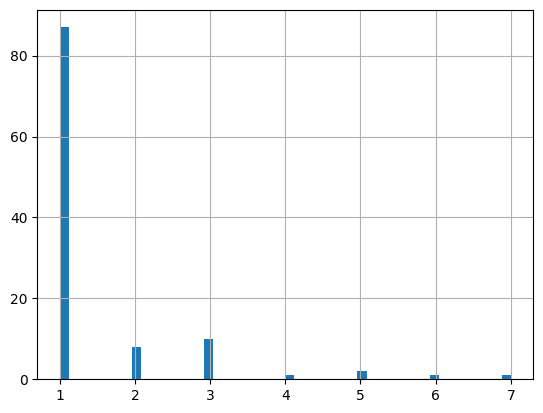

In [12]:
# Check the distribution of the lenght of the reviews
df_raw[df_raw["Language_review"] == "unknown"]["Review"].str.len().hist(bins=50)

It seems they are empty reviews or just filled with punctuation. We can ignore them for the analysis.

<a class="anchor" id="4">

# 4. Exploratory Data Analysis of the Ita-Fr-Eng Dataset
    
</a>

`df` is the dataset used in this chapter

In [19]:
# Create a copy of the initial dataset to avoid losing the raw information
df = df_raw.copy()

In [20]:
df.sample(10)

Brand            Model       Price Discounted Price  Product Code  \
14245     KIPRUN       K 500 GRIP       39,99       39,99¬†‚Ç¨     8800255.0   
4836   DECATHLON          RUN ONE  13,99¬†‚Ç¨       12,99¬†‚Ç¨     8351755.0   
370      KALENJI    JOGFLOW 100.1  19,99¬†‚Ç¨       17,99¬†‚Ç¨     8733464.0   
15158     KIPRUN         KS 900.2      139,99      139,99¬†‚Ç¨     8892063.0   
124      KALENJI    JOGFLOW 100.1  19,99¬†‚Ç¨       17,99¬†‚Ç¨     8733464.0   
4092     KALENJI    JOGFLOW 100.1  19,99¬†‚Ç¨       17,99¬†‚Ç¨     8733464.0   
18633     KIPRUN     MT CUSHION 2      109,99      109,99¬†‚Ç¨     8759747.0   
9097     KALENJI  RUN ACTIVE GRIP       34,99       24,99¬†‚Ç¨     8572326.0   
22055    KALENJI       RUN ACTIVE       29,99       19,99¬†‚Ç¨     8558959.0   
13537    KALENJI  RUN ACTIVE GRIP       34,99       24,99¬†‚Ç¨     8572326.0   

                                                   Color    Type Of Ground  \
14245                                       nero grafite               NaN   
4836                   grigio acciaio / bianco brillante  STRADA, Sentiero   
370                           nero fumo / grigio argento  STRADA, Sentiero   
15158  blu acciaio / bianco cotone / arancio chiaro fluo            STRADA   
124                           nero fumo / grigio argento  STRADA, Sentiero   
4092                          nero fumo / grigio argento  STRADA, Sentiero   
18633                                        blu ardesia     TERRENO MISTO   
9097                               grigio cemento / rosa  STRADA, Sentiero   
22055                               grigio malva pallido  STRADA, Sentiero   
13537                              grigio cemento / rosa  STRADA, Sentiero   

        Drop        Waterproof          Season  ...  \
14245    NaN  Non impermeabile             NaN  ...   
4836   10 mm  Non impermeabile   Tutto l‚'anno  ...   
370     6 mm  Non impermeabile   Tutto l‚'anno  ...   
15158   6 mm  Non impermeabile             NaN  ...   
124     6 mm  Non impermeabile   Tutto l‚'anno  ...   
4092    6 mm  Non impermeabile  Tutto l‚Äôanno  ...   
18633   4 mm  Non impermeabile             NaN  ...   
9097   10 mm  Non impermeabile  Tutto l‚Äôanno  ...   
22055  10 mm  Non impermeabile   Tutto l‚'anno  ...   
13537  10 mm  Non impermeabile  Tutto l‚Äôanno  ...   

                                                  Review            Reviewer  \
14245                           Bon rapport qualité prix       Marc, Francia   
4836       Prodotto adatto alle esigenze di chi lo calza     Claudia, Italia   
370                                             Perfetto       Luigi, Italia   
15158  Je cherchais une chaussure capable de me donne...     Thibaut, Belgio   
124                                 Buona qualità prezzo     Manuele, Italia   
4092                                             Average       Ramesh, India   
18633  Le avevo prese nell'ottica di usarle per le ul...     Giorgio, Italia   
9097                                                 NaN  ‰∏≠ÂõΩÂÆ¢Êà∑, Cina   
22055                                leggere e ben fatte      Nunzio, Italia   
13537                                       ÈûãÂ∫ïÊâìÊªë  ‰∏≠ÂõΩÂÆ¢Êà∑, Cina   

         Date Foot Movement Cushioning Lightness Adherence Unnamed: 34  \
14245   1m fa           NaN        5.0       4.0       NaN         NaN   
4836    2a fa           5.0        5.0       4.0       NaN         NaN   
370     9m fa           5.0        5.0       5.0       5.0         NaN   
15158  11m fa           NaN        5.0       NaN       NaN         NaN   
124     4m fa           4.0        4.0       4.0       4.0         NaN   
4092    6m fa           3.0        3.0       3.0       4.0         NaN   
18633   1a fa           2.0        3.0       3.0       NaN         NaN   
9097    5m fa           NaN        NaN       NaN       NaN         NaN   
22055   8m fa           5.0        5.0       5.0       5.0         NaN   
13537   2a fa           NaN        NaN      

In [21]:
# Define a function to collect some basic information
def overview(df):
    column = []
    dtypes = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        column.append(item) # feature name
        dtypes.append(df[item].dtype) # data type
        unique.append(len(df[item].unique())) # how many unique values in the feature
        missing.append(df[item].isna().sum()) # amount of missing values
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2)) # percentage of missing values
    
    output = pd.DataFrame({
        'Column': column, 
        'Type': dtypes,
        'Unique': unique,
        'Missing': missing, 
        'Percentage Missing': pc_missing
    })
    
    return output

In [22]:
print('dataset shape: ' + str(df.shape))
overview(df)

dataset shape: (24419, 37)


Column     Type  Unique  Missing  Percentage Missing
0                      Brand   object      11        0                0.00
1                      Model   object      42        0                0.00
2                      Price   object      27        0                0.00
3           Discounted Price   object      28        0                0.00
4               Product Code  float64      48       34                0.14
5                      Color   object      45      133                0.54
6             Type Of Ground   object      10      351                1.44
7                       Drop   object       7      837                3.43
8                 Waterproof   object       3     1323                5.42
9                     Season   object       6     7174               29.38
10         Level Of Practice   object       9      804                3.29
11                Foot Width   object       2       30                0.12
12                 Staccable   object       2     7654               31.34
13  Circumstance Of Practice   object       4    11137               45.61
14         Running Intensity   object      12     1284                5.26
15               Shoe Height   object       3       34                0.14
16            Type Of Jacket   object       4     7252               29.70
17           Detachable Sole   object       3       34                0.14
18    Recommended Frequency    object      11     7645               31.31
19                  Category   object      56       34                0.14
20    Sole That Leaves Marks   object       3     6572               26.91
21             Main Material   object       5       34                0.14
22            Type Of Stride   object       6     1694                6.94
23         Place Of Practice   object       9       34                0.14
24           Type Of Closure   object       4       34                0.14
25                    Rating   object       5        0                0.00
26                     Title   object    8632    10996               45.03
27                    Review   object   16338     3709               15.19
28                  Reviewer   object    8566        4                0.02
29                      Date   object      23        0                0.00
30             Foot Movement  float64       6     9057               37.09
31                Cushioning  float64       6     9616               39.38
32                 Lightness  float64       6    10929               44.76
33                 Adherence  float64       6     9991               40.91
34               Unnamed: 34  float64       6    24295               99.49
35           Language_review   object      33        0                0.00
36        Language_review_ft   object      59        0                0.00

In [23]:
# Calculate the length of comments
comment_lengths = df['Review'].str.len()

# Check the descriptive statistics
comment_lengths.describe()

count    20703.000000
mean        82.866879
std        137.211979
min          1.000000
25%         17.000000
50%         40.000000
75%         91.000000
max       2935.000000
Name: Review, dtype: float64

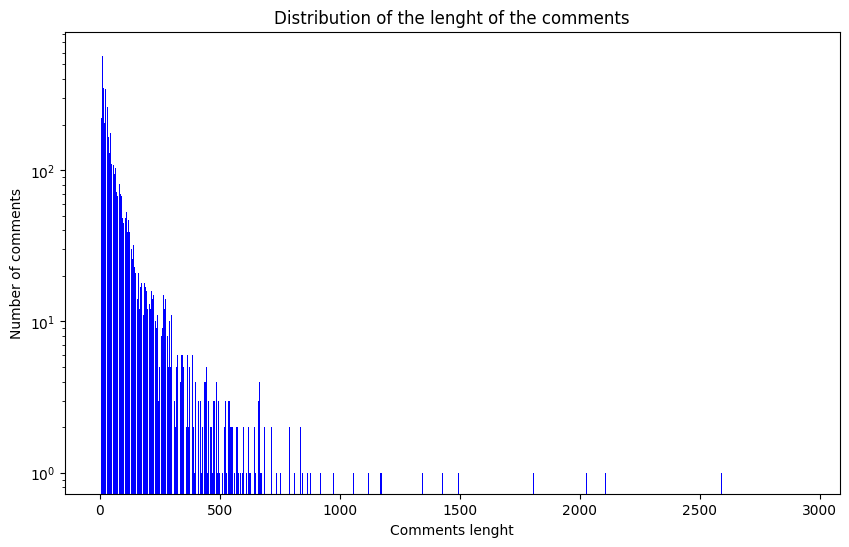

In [24]:
# Calculate the number of comments for each lenght
comment_length_counts = comment_lengths.value_counts().sort_index()

# Barplot
plt.figure(figsize=(10, 6))
plt.bar(comment_length_counts.index, comment_length_counts.values, color='blue')
plt.xlabel('Comments lenght')
plt.ylabel('Number of comments')
plt.title('Distribution of the lenght of the comments')
plt.yscale('log')

plt.show()

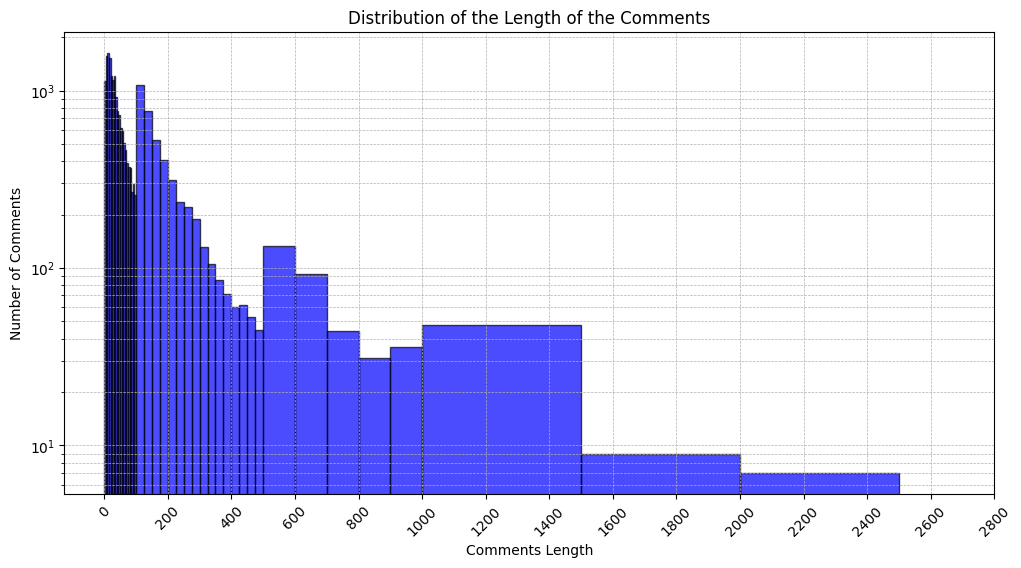

In [25]:
# Create different bins for the reviews
bins = np.concatenate([
    np.arange(0, 100, 5),      # Bin every 5 characters until 100
    np.arange(100, 500, 25),   # Bin every 25 characters until 500
    np.arange(500, 1000, 100), # Bin every 100 characters until 1000
    np.arange(1000, 3000, 500) # Bin every 500 characters until 3000
])

# Barplot
plt.figure(figsize=(12, 6))
plt.hist(comment_lengths, bins=bins, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Comments Length')
plt.ylabel('Number of Comments')
plt.title('Distribution of the Length of the Comments')
plt.yscale('log')  
plt.xticks(np.arange(0, 3000, step=200), rotation=45)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


From this barplot we can see that the majority of reviews is short and is between 10 and 150 words in length.
There are some very long reviews (over 1000 words), but they are rare and there is a very unbalanced (right-skewed) distribution.
There are some isolated spikes over 1000-1400 characters and they might be outliers or anomalies.

In [ ]:
# Filter comments with length = 3 to see if it makes sense to keep them
comments_length_3 = df[df['Review'].str.len() == 3]

In [ ]:
# Filter comments with length = 23
comments_length_23 = df[df['Review'].str.len() <= 23]

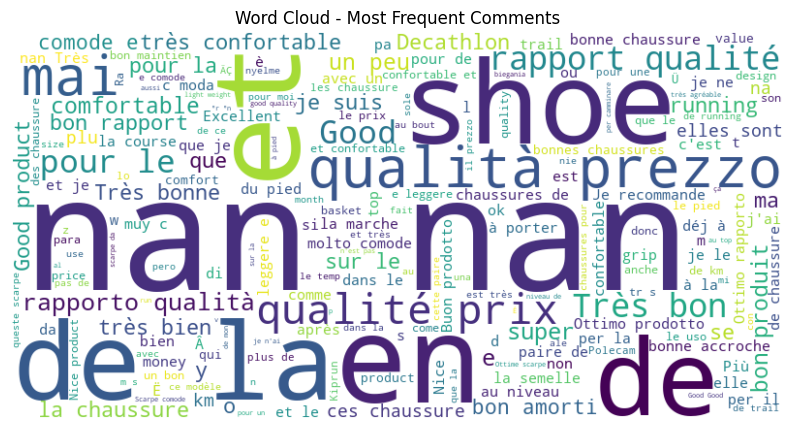

In [28]:
# WORDCLOUD WITHOUT DATA CLEANING
# Remove HTML tags and special characters from comments using regex
cleaned_comments = df['Review'].astype(str).apply(lambda x: re.sub('<.*?>|_x000D_√†', '', x))

# Convert the cleaned comments to a single string
all_comments = ' '.join(cleaned_comments)

# Create the Wordcloud
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Show the wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Comments')
plt.show()

<a class="anchor" id="5">

# 5. Data Cleaning
    
</a>

Steps
- Convert the variables in the correct format
- Fill Missing Values
- Drop unuseful columns
- Remove duplicates reviews -> it seems there are not

In [29]:
# Convert df into a Dataframe
df = pd.DataFrame(df)

### Remove the duplicates

In [30]:
# Check duplicates
duplicates_data = df.duplicated().sum()
prop_duplicates_data = df.duplicated().mean()

print(duplicates_data)
print(prop_duplicates_data)

3932
0.1610221548793972


In [31]:
# Drop the duplicates
df = df.drop_duplicates()

In [32]:
df.shape

(20487, 37)

### Check the format

In [33]:
# Reference Data: data were extracted in January. We use a single data as reference (15.01.2025)
reference_date = datetime(2025, 1, 1)

# Convert column data in datetime format
def convert_relative_date(relative_date):
    if isinstance(relative_date, str):
        if 'a fa' in relative_date:  # Year
            years_ago = int(relative_date.split('a')[0])
            estimated_date = reference_date - timedelta(days=years_ago * 365)
            return estimated_date.date()

        elif 'm fa' in relative_date:  # Month
            months_ago = int(relative_date.split('m')[0])
            month_offset = reference_date.month - months_ago
            year_adjust = reference_date.year
            if month_offset <= 0:  # If the month goes negative, move the year back
                year_adjust -= 1
                month_offset += 12
            estimated_date = reference_date.replace(year=year_adjust, month=month_offset, day=1)
            return estimated_date.date()

        elif 's fa' in relative_date:  # Week
            weeks_ago = int(relative_date.split('s')[0])
            estimated_date = reference_date - timedelta(weeks=weeks_ago)
            return estimated_date.date()

    return None 


df['Converted Date'] = df['Date'].apply(convert_relative_date)

In [34]:
df['Year'] = pd.to_datetime(df['Converted Date']).dt.year
df['Month'] = pd.to_datetime(df['Converted Date']).dt.month

In [35]:
# Clean Season fields
df['Season'] = df['Season'].str.replace("‚Äô", "'", regex=False)

# Convert Rating into numerical format
df['Rating'] = pd.to_numeric(df['Rating'].astype(str).str.extract(r'(\d) su 5')[0], errors='coerce')

# Convert waterproof into boolean
df['Waterproof'] = df['Waterproof'].astype(str).apply(lambda x: 'Yes' if 'Impermeabile' in x else 'No')


In [36]:
# Remove useless columns
df.drop(columns=["Unnamed: 34", "lang_comments", "Language_review", "Date", "Product Code", "Color", "Adherence", 
                 "Lightness", "Cushioning", "Foot Movement",  "Sole That Leaves Marks", "Type Of Closure", "Staccable", 
                 "Detachable Sole", "Type Of Jacket"], inplace=True, errors="ignore")

### Clean Categories

In [37]:
def map_level(val):
    if isinstance(val, str):
        val_lower = val.lower()
        if val_lower in [
            'principiante',
            'tutti i livelli',
            'principiante, intermedio',
            'principiante, intermedio, esperto, tutti i livelli'
        ]:
            return 'Beginner'
        elif val_lower in [
            'intermedio, esperto',
            'intermedio'
        ]:
            return 'Intermediate'
        elif val_lower == 'esperto':
            return 'Expert'
        else:
            return val  
    else:
        return val

df['Level Of Practice'] = df['Level Of Practice'].apply(map_level)

In [38]:
def map_ground_type(val):
    if isinstance(val, str):
        val_lower = val.lower().strip()

        if 'strada' in val_lower and 'sentiero' not in val_lower:
            return 'Road'

        elif any(term in val_lower for term in [
            'sentiero', 'terreno facile', 'terreno misto', 'tutti i terreni',
            'erba', 'asfalto', 'terra', 'sabbia'
        ]):
            return 'Mixed terrain'

        else:
            return 'Other'
    return val


# Applica la funzione alla colonna 'Type Of Ground'
df['Type Of Ground'] = df['Type Of Ground'].apply(map_ground_type)



In [39]:
def map_intensity(val):
    if pd.isna(val): return 'Unknown'
    val = val.lower()
    if 'più di 60' in val: return 'High'
    elif '30 - 60' in val: return 'Medium'
    elif '10 - 30' in val or '10 km' in val: return 'Low'
    else: return 'Unknown'


df['Running Intensity'] = df['Running Intensity'].apply(map_intensity)

In [40]:
def map_circumstance(val):
    if pd.isna(val): return 'Unknown'
    val = val.lower()
    if 'competizione' in val: return 'Race'
    else: return 'Training'

df["Circumstance Of Practice"] = df["Circumstance Of Practice"].apply(map_circumstance)
                                                                

In [41]:
def map_place(val):
    if pd.isna(val): return 'Unknown'
    val = val.lower()
    if 'interno' in val and 'esterno' in val:
        return 'Mixed'
    elif 'interno' in val:
        return 'Indoor'
    elif 'esterno' in val:
        return 'Outdoor'
    else:
        return 'Other'

df["Place Of Practice"] = df["Place Of Practice"].apply(map_place)

In [42]:
def map_stride(val):
    if pd.isna(val): return 'Unknown'
    val = val.lower()
    if 'pronatrice' in val: return 'Pronator'
    elif 'supinatrice' in val: return 'Supinator'
    elif 'neutro' in val: return 'Neutral'
    elif 'ogni tipo' in val: return 'All'
    else: return 'Unknown'

df["Type Of Stride"] = df["Type Of Stride"].apply(map_stride)

In [43]:
def map_category(val):
    if pd.isna(val): return 'Unknown'
    val = val.lower()
    if 'ammortizzamento' in val: return 'Cushioning'
    elif 'comfort' in val: return 'Comfort'
    elif 'stabilit' in val: return 'Stability'
    elif 'trazione' in val: return 'Traction'
    else: return 'Altro'

df["Category"] = df["Category"].apply(map_category)
                                      

### Fill Null Values

In [44]:
df['Type Of Ground'] = df['Type Of Ground'].fillna('Unknown')
df['Level Of Practice'] = df['Level Of Practice'].fillna('Unknown')
df['Main Material'] = df['Main Material'].fillna('Unknown')

In [45]:
df[["Review", "Rating"]].dropna()

Review  Rating
0      scarpe per running non troppo impegnativo, mor...       5
1      Ottimo prodotto per rapporto qualità prezzo. C...       4
2      Una scarpa eccellente!_x000D_\nAcquisto azzecc...       5
3                                     comode e di design       5
4                                                 comode       5
...                                                  ...     ...
24414  Nous achetons souvent les chaussures de sport ...       5
24415            Produit respectant la réputation asics!       5
24416                                        Bon produit       5
24417  Conseil : prendre une taille plus grande.\nMai...       5
24418  J'avale les kms s'en m'en rendre compte, aucun...       5

[20277 rows x 2 columns]

Price & Discounted Price

In [46]:
# Function to clean PRICE
def clean_price(value):
    if pd.isna(value):
        return None
    # Removes all characters except digits and comma
    value = re.sub(r'[^\d,]', '', str(value))
    # Replaces comma with decimal point
    value = value.replace(',', '.')
    try:
        return float(value)
    except:
        return None

df.loc[:, 'Price'] = df['Price'].apply(clean_price)
df.loc[:, 'Discounted Price'] = df['Discounted Price'].apply(clean_price)



<a class="anchor" id="6">

# 6. Features Engineering
    
</a>

In [47]:
# Create Gender column from model information

def extract_gender(model):
    model = model.lower()  # lower to avoid uppercase problems
    if "uomo" in model:
        return "Man"
    elif "donna" in model:
        return "Woman"
    elif "unisex" in model or "senza genere" in model:
        return "Unisex"
    else:
        return "Unknown"  


df['Gender'] = df['Model'].apply(extract_gender)

In [48]:
# Create discounted price

def calculate_discount(price, discounted_price):
    if discounted_price > price:
        return np.nan  # error and the discount is not valid
    elif discounted_price == price:
        return 0  # no discount
    else:
        return round(((price - discounted_price) / price) * 100, 2)  

df['% Discounted Price'] = df.apply(lambda row: calculate_discount(row['Price'], row['Discounted Price']), axis=1)

In [49]:
# Binary Flag
df['is_discounted'] = df['Price'] > df['Discounted Price']

In [50]:
# Remove useless columns
df.drop(columns=["Reviewer"], inplace=True, errors="ignore")

# New column Title + Review

In [51]:
df['Title'] = df['Title'].fillna('').astype(str)
df['Full_Review'] = df['Title'].str.strip() + ' ' + df['Review'].astype(str).str.strip()

# Remove multiple spaces if present 
df['Full_Review'] = df['Full_Review'].str.replace(r'\s+', ' ', regex=True).str.strip()


In [52]:
# Drop old title and review column
df.drop(columns=["Title", "Review"], inplace=True, errors="ignore")

In [53]:
#df['Review'] = df['Review'].fillna('').astype(str)
df['review_length'] = df['Full_Review'].apply(len)
df['review_length'] = df['review_length'].astype(int)

In [54]:
# NEW VARIABLE WORD COUNT
df['word_count'] = df['Full_Review'].apply(lambda x: len(x.split()))

In [55]:
df['Drop'] = df['Drop'].str.extract(r'(\d+)').astype(float)

### New column: Sentiment label

In [56]:
def rating_to_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment_label'] = df['Rating'].apply(rating_to_sentiment)


In [57]:
df.sample(10).T

23722  \
Brand                                                                 ASICS   
Model                                                        GEL WINDHAWK 4   
Price                                                                 44.99   
Discounted Price                                                      44.99   
Type Of Ground                                                Mixed terrain   
Drop                                                                   10.0   
Waterproof                                                               No   
Season                                                                  NaN   
Level Of Practice                                                  Beginner   
Foot Width                                                           Medium   
Circumstance Of Practice                                            Unknown   
Running Intensity                                                       Low   
Shoe Height                                                    Tomaia bassa   
Recommended Frequency                                                   NaN   
Category                                                         Cushioning   
Main Material                                                     Sintetico   
Type Of Stride                                                      Neutral   
Place Of Practice                                                   Outdoor   
Rating                                                                    5   
Language_review_ft                                                       hu   
Converted Date                                                   2024-12-01   
Year                                                                 2024.0   
Month                                                                  12.0   
Gender                                                              Unknown   
% Discounted Price                                                      0.0   
is_discounted                                                         False   
Full_Review               Tart√≥s darab Nem fut√°sra haszn√°lom, azt tud...   
review_length                                                           274   
word_count                                                               42   
sentiment_label                                                    Positive   

                                                                      24062  \
Brand                                                                KIPRUN   
Model                                                         JOGFLOW 190.1   
Price                                                                 24.99   
Discounted Price                                                      24.99   
Type Of Ground                                                Mixed terrain   
Drop                                                                    4.0   
Waterproof                                                               No   
Season                                                         Tutto l'anno   
Level Of Practice                                                  Beginner   
Foot Width                                                           Medium   
Circumstance Of Practice                                            Unknown   
Running Intensity                                                       Low   
Shoe Height                                                      Tomaia mid   
Recommended Frequency                       occasionale, tutte le frequenze   
Category                                                         Cushioning   
Main Material                                                    Poliestere   
Type Of Stride                                                      Neutral   
Place Of Practice                                                     Mixed   
Rating                                                                    4   
Language_review_ft                      

In [58]:
# Path for saving
output_path = "/Users/giuliabovenga/Desktop/Thesis/Preprocessed Dataset/Decathlon_reviews_final.csv"

# Reemove the file if already exist
if os.path.exists(output_path):
    os.remove(output_path)
    
# Eport to csv file
df.to_csv("/Users/giuliabovenga/Desktop/Thesis/Preprocessed Dataset/Decathlon_reviews_final.csv", 
               index=False, 
               encoding="utf-8-sig")

# Adidas Dataset Append

In [ ]:
#Import ADidas dataset
df_adidas = pd.read_csv("/Users/giuliabovenga/Desktop/Preprocessed Dataset/Adidas_reviews_final.csv") 

In [60]:
# Create year and month from converted date
df_adidas['Converted Date'] = pd.to_datetime(df_adidas['Converted Date'], errors='coerce')
df_adidas['year'] = df_adidas['Converted Date'].dt.year
df_adidas['month'] = df_adidas['Converted Date'].dt.month

In [61]:
# Add source column to keep track of the different data origins 
df['Source'] = 'Decathlon'
df_adidas['Source'] = 'Adidas'

In [62]:
# Uniform the columns (fill with nan if they are not in the Adidas dataset)
decathlon_columns = df.columns.tolist()
for col in decathlon_columns:
    if col not in df_adidas.columns:
        df_adidas[col] = pd.NA

In [63]:
df_adidas = df_adidas[decathlon_columns]

In [64]:
# Concatenate the two datasets
df = pd.concat([df, df_adidas], ignore_index=True)

In [65]:
# Reset the index
df.reset_index(drop=True, inplace=True)
# Check
print("Full Dataset shape:", df.shape)
print("Origins:\n", df['Source'].value_counts())

Full Dataset shape: (27733, 31)
Origins:
 Source
Decathlon    20487
Adidas        7246
Name: count, dtype: int64


<a class="anchor" id="7">

# 7. Patterns Exploration
    
</a>

<a class="anchor" id="7.1">

### 7.1 Rating Breakdown
    
</a>

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_30985/583656068.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=df, ax=ax2, order=stars_counts.index, palette=palette)


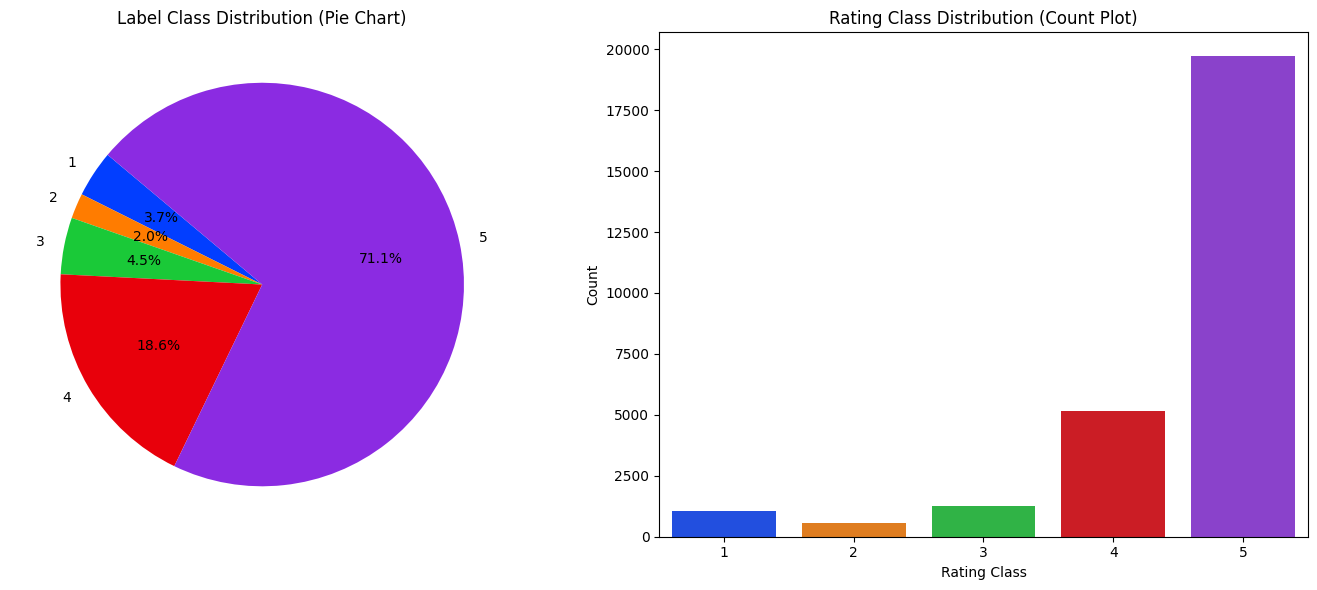

In [66]:
stars_counts = df["Rating"].value_counts().sort_index()

palette = sns.color_palette("bright", n_colors=len(stars_counts))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(stars_counts, labels=stars_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Label Class Distribution (Pie Chart)')
sns.countplot(x="Rating", data=df, ax=ax2, order=stars_counts.index, palette=palette)
ax2.set_title('Rating Class Distribution (Count Plot)')
ax2.set_xlabel('Rating Class')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

The dataset seems very unbalanced, with the majority of the reviews having a positive sentiment.

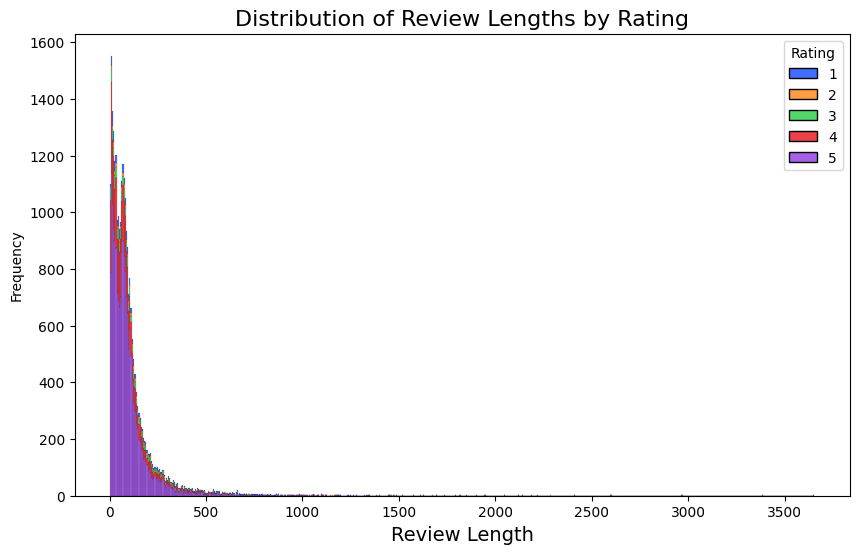

In [67]:
df["review_length"] = df["Full_Review"].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="review_length", hue="Rating", multiple="stack", palette="bright")
plt.title('Distribution of Review Lengths by Rating', fontsize=16)
plt.xlabel('Review Length', fontsize=14)
plt.ylabel('Frequency')
plt.show()

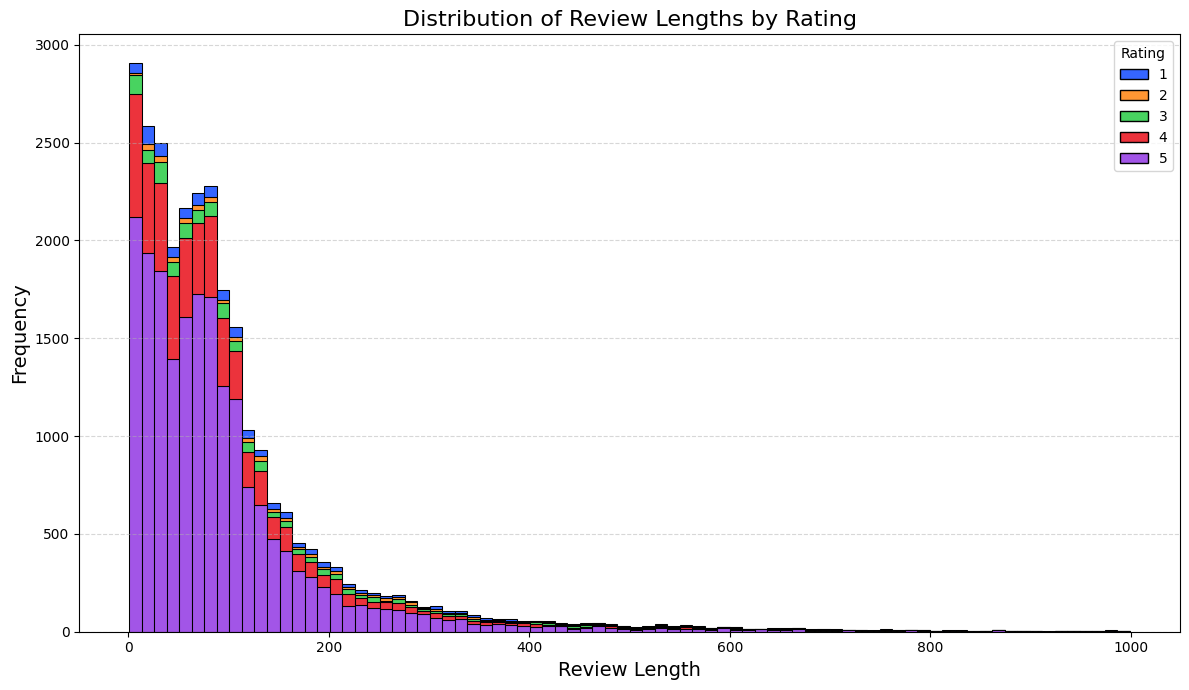

In [ ]:
custom_palette = {
    1: '#023eff',   # blu
    2: '#ff7c00',   # orange
    3: '#1ac938',   # green
    4: '#e8000b',   # red
    5: '#8b2be2'    # purple
}

# Outlier Filter
max_length = 1000

plt.figure(figsize=(12, 7))
sns.histplot(
    data=df[df["review_length"] < max_length],
    x="review_length",
    hue="Rating",
    multiple="stack",
    palette=custom_palette,
    bins=80,
    alpha=0.8
)

plt.title('Distribution of Review Lengths by Rating', fontsize=16)
plt.xlabel('Review Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Insights:
- Very unbalanced distribution to the left (right-skewed).
- Most reviews have a short length (e.g., < 200 characters), with a long tail toward the right. This is common in review datasets: many users write short comments, few write detailed reviews.
- The majority of reviews have rating 5: this indicates a strong positive bias in the dataset-a phenomenon known as positivity bias typical of e-commerce.
- Longer reviews often associated with extreme ratings (1 or 5)


/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_30985/4178495433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Rating", y="review_length", data=df, palette="bright")


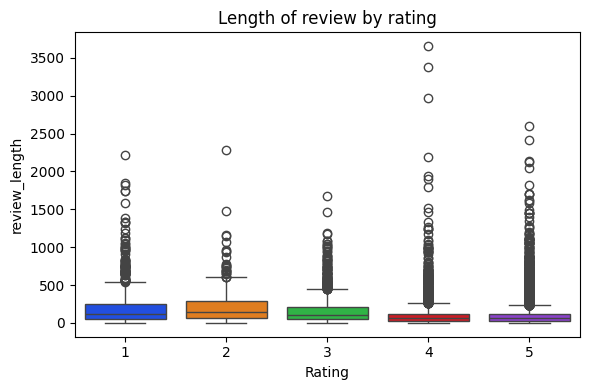

In [ ]:
# Boxplot review lenght vs rating
plt.figure(figsize=(6,4))
sns.boxplot(x="Rating", y="review_length", data=df, palette="bright")
plt.title("Length of review by rating")
plt.tight_layout()
plt.show()

Reviews at ratings 1, 2, and 3 are on average longer than those at ratings 4 and 5. Satisfied customers often write only "great" or "perfect", while those dissatisfied or neutral ones explain more (e.g. "Light shoe, but the sole came off after 2 weeks.") This might introduce structural bias in text, where models may automatically associate longer lengths with negative sentiment.

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_30985/2441853782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment_label", data=df, palette="pastel")


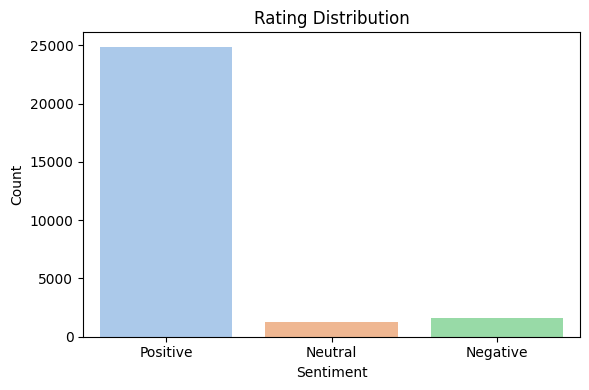

In [70]:
# Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment_label", data=df, palette="pastel")
plt.title("Rating Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Does it makes sense to keep the neutral class or to merge it with the negative one?

/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_30985/1000415403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment_label", y="% Discounted Price", data=df, palette="pastel")


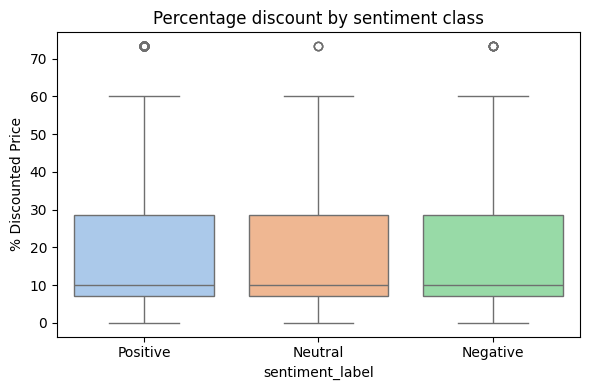

In [71]:
#  % Discount vs sentiment
plt.figure(figsize=(6,4))
sns.boxplot(x="sentiment_label", y="% Discounted Price", data=df, palette="pastel")
plt.title("Percentage discount by sentiment class")
plt.tight_layout()
plt.show()

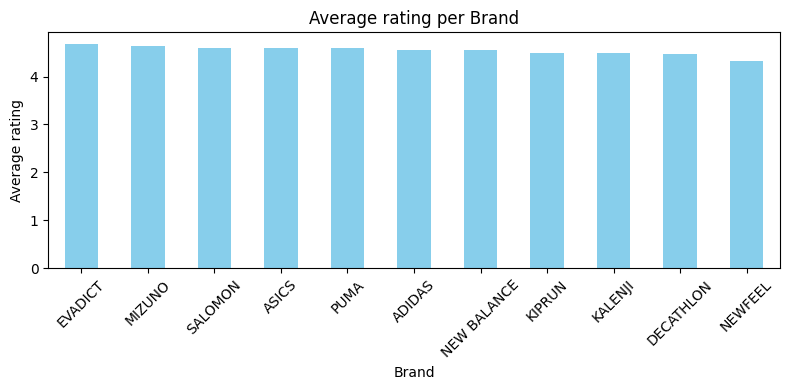

In [72]:
# Average rating per Brand
brand_rating = df.groupby("Brand")["Rating"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
brand_rating.plot(kind="bar", color="skyblue")
plt.title("Average rating per Brand")
plt.ylabel("Average rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
# Mean and standard deviation for Rating and Brand
stats_brand = df.groupby("Brand")["Rating"].agg(['mean', 'std']).reset_index()
print("Statistical rating per Brand:")
print(stats_brand)

Statistical rating per Brand:
          Brand      mean       std
0        ADIDAS  4.562773  0.933199
1         ASICS  4.596567  0.797769
2     DECATHLON  4.479905  0.992909
3       EVADICT  4.689286  0.661181
4       KALENJI  4.488659  0.950506
5        KIPRUN  4.496480  0.982819
6        MIZUNO  4.641509  0.930664
7   NEW BALANCE  4.545455  0.939938
8       NEWFEEL  4.318386  1.058714
9          PUMA  4.588235  0.820851
10      SALOMON  4.600000  0.632456


/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_30985/1051016035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_rating.values, y=model_rating.index, palette="viridis")


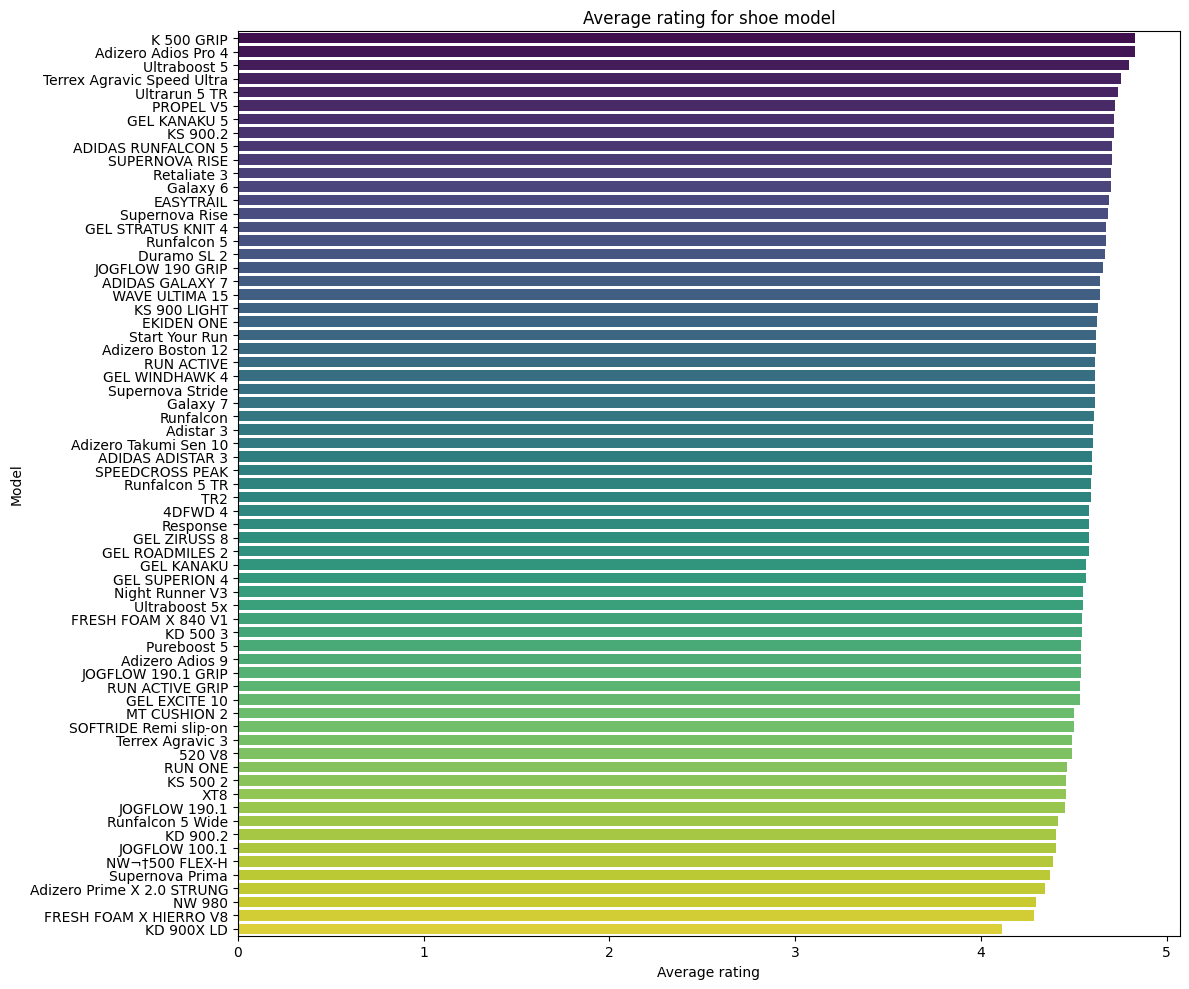

In [ ]:
# Sort by mean rating
model_rating = df.groupby("Model")["Rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x=model_rating.values, y=model_rating.index, palette="viridis")
plt.title("Average rating for shoe model")
plt.xlabel("Average rating")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


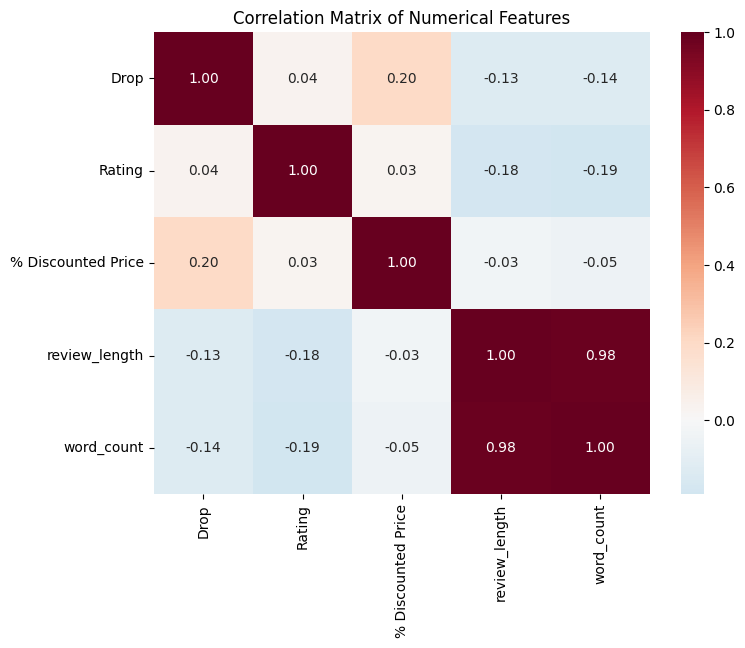

In [75]:
# Select numerical columns including Rating
numeric_cols = df.select_dtypes(include=['int64', 'float64']).copy()

# Check if Rating is numerical
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Add Rating if it's not already included
if 'Rating' not in numeric_cols.columns:
    numeric_cols['Rating'] = df['Rating']

# Remove month and year
numeric_cols = numeric_cols.drop(columns=['Month', 'Year'], errors='ignore')

# Correlation matrix
corr_matrix = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
plt.title("Correlation Matrix of Numerical Features")
plt.show()



<a class="anchor" id="8">

# 8. NLP Patterns Exploration
    
</a>

In this section I will explore the most frequent keywords in the reviews splitted by language (Italian, French and English) to identify possible relevant aspects to annotate. 

In [76]:
# Load the spaCy model
nlp = spacy.load("it_core_news_sm")
pd.options.mode.copy_on_write = True

In [77]:
DetectorFactory.seed = 0  # to repeat the results

def better_detect_language(text):
    if not isinstance(text, str):
        return "unknown"

    # Light cleaning
    cleaned = text.strip()
    cleaned = re.sub(r'\s+', ' ', cleaned)  # normalize the spaces
    # If the text is empty after the strip
    if len(cleaned) == 0:
        return "unknown"

    try:
        return detect(cleaned)
    except:
        return "unknown"

In [78]:
df["Language_review"] = df["Full_Review"].apply(better_detect_language)

In [79]:
df["Language_review"].value_counts()

Language_review
en         8465
it         5926
fr         5685
vi         1431
es         1025
pl          711
tr          539
so          403
pt          377
de          339
ro          323
ca          296
hu          271
tl          262
af          201
no          184
id          160
cs          154
da          143
nl          118
sq          106
sk           99
fi           77
lt           72
unknown      72
hr           52
sv           48
sl           40
el           40
cy           37
et           29
lv           28
sw           20
Name: count, dtype: int64

<a class="anchor" id="8.1">

## 8.1 Italian Dataset
    
</a>

In [80]:
# Filter the Italian reviews
df_ita = df[df["Language_review"] == "it"].drop(columns=["Language_review"])
print("Dataset dimension after the Italian reviews filter:", df_ita.shape)

Dataset dimension after the Italian reviews filter: (5926, 31)


In [81]:
# Create a list of all the reviews to analyze
texts_ita = df_ita['Full_Review'].dropna().tolist()

In [82]:
# Extract noun lemmas from reviews
nouns = []

for doc in nlp.pipe(texts_ita, disable=["ner", "parser"]):  
    for token in doc:
        if token.pos_ == "NOUN":
            lemma = token.lemma_.lower()
            # Filter out generic words (not useful for the analysis)
            if lemma not in ["scarpa", "modello", "prodotto", "cliente", "negozio", "utilizzo", "scarpare"]:
                nouns.append(lemma)

In [83]:
# Count the frequency of the substantives
noun_freq = Counter(nouns)

In [84]:
# Change into a dataframe and sort
noun_freq_ita = pd.DataFrame(noun_freq.items(), columns=["Lemma", "Frequency"])
noun_freq_ita = noun_freq_ita.sort_values(by="Frequency", ascending=False).reset_index(drop=True)


In [85]:
# Most frequents aspects (20)
noun_freq_ita.head(20)

Lemma  Frequency
0      qualità       1091
1       prezzo       1005
2     rapporto        783
3     acquisto        624
4        piede        487
5          uso        385
6       scarpe        339
7        corsa        315
8       giorno        255
9         paio        237
10  chilometro        221
11   consiglio        220
12     running        209
13      colore        199
14      comode        183
15   camminata        178
16    palestra        166
17       tempo        159
18        anno        153
19       volta        148

### Patterns by Sentiment

In this section, I will explore the lexical differences between positive, negative, and neutral reviews. I will analyze the most frequent nouns in the three groups and visualize the results with WordClouds in order to identify the key aspects mentioned by customers and the associated tone.

In [86]:
# Extract substantives
def extract_substantives(texts_ita, excluded_words=None):
    nouns = []
    for doc in nlp.pipe(texts_ita, disable=["ner", "parser"]):
        for token in doc:
            if token.pos_ == "NOUN":
                lemma = token.lemma_.lower()
                if excluded_words and lemma in excluded_words:
                    continue
                nouns.append(lemma)
    return Counter(nouns)

In [87]:
# List of lemmas to be excluded (generic non-informative words)
stop_nouns_ita = ["scarpa", "scarpe", "modello", "prodotto", "cliente", "negozio", "paio", "articolo", "utilizzo", "acquisto"]

# Divide the datasets based on the sentiment
df_pos_ita = df_ita[df_ita["sentiment_label"] == "Positive"]
df_neg_ita = df_ita[df_ita["sentiment_label"] == "Negative"]
df_neu_ita = df_ita[df_ita["sentiment_label"] == "Neutral"]

In [88]:
# Extract the substantives most frequent in each group
freq_pos_ita = extract_substantives(df_pos_ita["Full_Review"].dropna(), excluded_words=stop_nouns_ita)
freq_neg_ita = extract_substantives(df_neg_ita["Full_Review"].dropna(), excluded_words=stop_nouns_ita)
freq_neu_ita = extract_substantives(df_neu_ita["Full_Review"].dropna(), excluded_words=stop_nouns_ita)

In [89]:
# Wordcloud
def plot_wordcloud(freq_dict, title, color="black"):
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap=color).generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

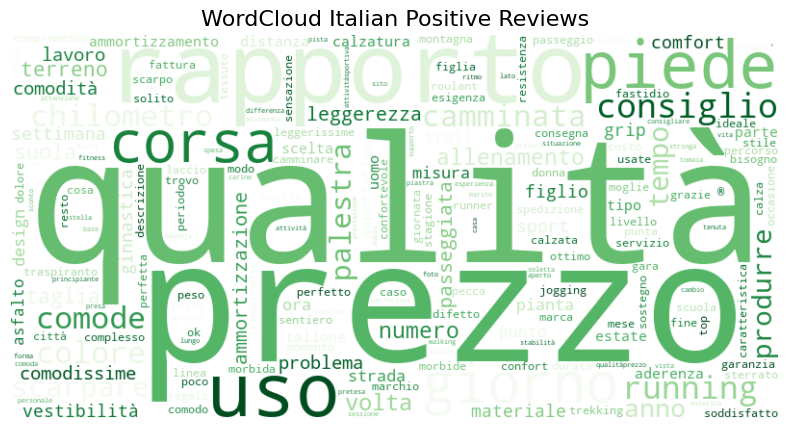

In [90]:
#  Wordcloud Positive
plot_wordcloud(freq_pos_ita, "WordCloud Italian Positive Reviews", color="Greens")

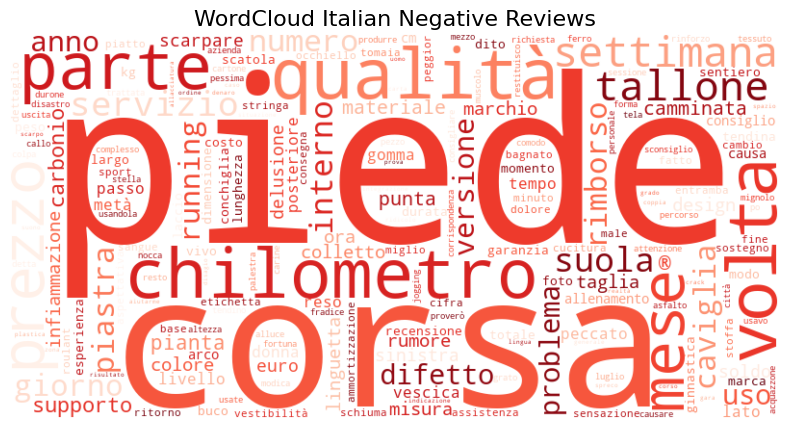

In [91]:
#  Wordcloud Negative reviews
plot_wordcloud(freq_neg_ita, "WordCloud Italian Negative Reviews", color="Reds")


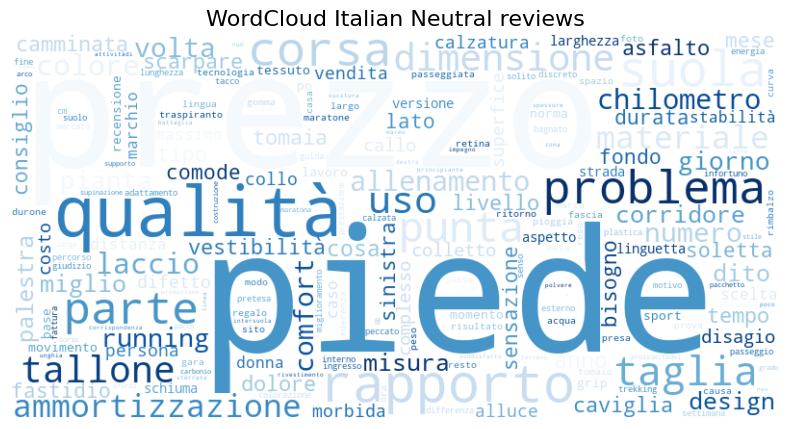

In [92]:
#  Wordcloud Neutral reviews
plot_wordcloud(freq_neu_ita, "WordCloud Italian Neutral reviews", color="Blues")

### Comparative frequencies for aspects in the three groups

In [93]:
# Extract frequencies
freq_pos_ita = extract_substantives(df_pos_ita["Full_Review"].dropna(), stop_nouns_ita)
freq_neg_ita = extract_substantives(df_neg_ita["Full_Review"].dropna(), stop_nouns_ita)
freq_neu_ita = extract_substantives(df_neu_ita["Full_Review"].dropna(), stop_nouns_ita)

# Convert into dataframes
df_pos_freq_ita = pd.DataFrame(freq_pos_ita.items(), columns=["lemma", "freq_pos"])
df_neg_freq_ita = pd.DataFrame(freq_neg_ita.items(), columns=["lemma", "freq_neg"])
df_neu_freq_ita = pd.DataFrame(freq_neu_ita.items(), columns=["lemma", "freq_neu"])

In [94]:
# Count how many reviews per sentiment
n_pos_ita = len(df_pos_ita)
n_neg_ita = len(df_neg_ita)
n_neu_ita = len(df_neu_ita)

In [95]:
# Merge the 3 DataFrames on the words (lemmas)
df_freq_ita = df_pos_freq_ita.merge(df_neg_freq_ita, on="lemma", how="outer")
df_freq_ita = df_freq_ita.merge(df_neu_freq_ita, on="lemma", how="outer")

# Replace NaNs with 0 and sort by sum of frequencies
df_freq_ita.fillna(0, inplace=True)
df_freq_ita[["freq_pos", "freq_neg", "freq_neu"]] = df_freq_ita[["freq_pos", "freq_neg", "freq_neu"]].astype(int)
df_freq_ita["total"] = df_freq_ita["freq_pos"] + df_freq_ita["freq_neg"] + df_freq_ita["freq_neu"]
df_freq_ita = df_freq_ita.sort_values(by="total", ascending=False).reset_index(drop=True)

In [96]:
# Add normalized frequencies
df_freq_ita["freq_pos_norm"] = df_freq_ita["freq_pos"] / n_pos_ita
df_freq_ita["freq_neg_norm"] = df_freq_ita["freq_neg"] / n_neg_ita
df_freq_ita["freq_neu_norm"] = df_freq_ita["freq_neu"] / n_neu_ita

In [97]:
# Mean normalized frequency
df_freq_ita["freq_normalized"] = (
    df_freq_ita["freq_pos_norm"] + df_freq_ita["freq_neg_norm"] + df_freq_ita["freq_neu_norm"]
    ) / 3

# Sort by total frequency
df_freq_ita = df_freq_ita.sort_values(by="total", ascending=False).reset_index(drop=True)

# Shows the top 20 most frequent words with distribution by sentiment
print(df_freq_ita.head(20))

         lemma  freq_pos  freq_neg  freq_neu  total  freq_pos_norm  \
0      qualità       988        28        75   1091       0.186662   
1       prezzo       905        21        79   1005       0.170981   
2     rapporto       743         0        40    783       0.140374   
3        piede       339        57        91    487       0.064047   
4          uso       353        10        22    385       0.066692   
5        corsa       246        36        33    315       0.046476   
6       giorno       231        12        12    255       0.043643   
7   chilometro       179        27        15    221       0.033818   
8    consiglio       208         5         7    220       0.039297   
9      running       185        11        13    209       0.034952   
10      colore       176         7        16    199       0.033251   
11      comode       175         1         7    183       0.033063   
12   camminata       162         8         8    178       0.030606   
13    scarpare      

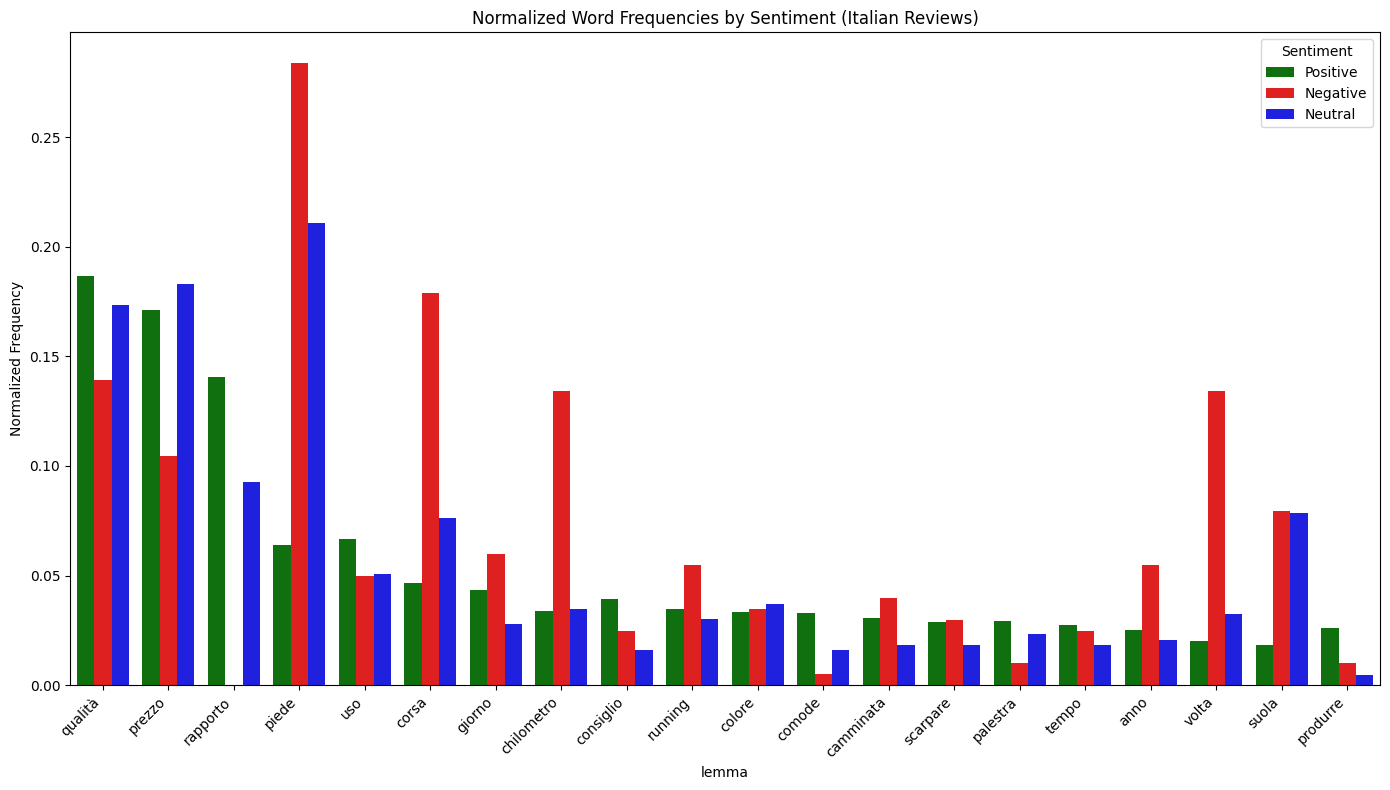

In [98]:
# Number of top lemmas to visualize
top_n = 20

# Select top lemmas
top_lemmas = df_freq_ita.head(top_n)

# Melt the DataFrame to long format for seaborn
df_melted = top_lemmas.melt(
    id_vars="lemma",
    value_vars=["freq_pos_norm", "freq_neg_norm", "freq_neu_norm"],
    var_name="Sentiment",
    value_name="Normalized Frequency"
)

# Rename the sentiment labels for clarity
df_melted["Sentiment"] = df_melted["Sentiment"].replace({
    "freq_pos_norm": "Positive",
    "freq_neg_norm": "Negative",
    "freq_neu_norm": "Neutral"
})

# Plot grouped barplot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_melted,
    x="lemma",
    y="Normalized Frequency",
    hue="Sentiment",
    palette={"Positive": "green", "Negative": "red", "Neutral": "blue"}
)
plt.title("Normalized Word Frequencies by Sentiment (Italian Reviews)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Sentiment")
plt.show()

From the distribution of words by sentiment class, it appears that some aspects such as "quality" and "price" are strongly associated with positive reviews, while others such as "sole" or "number" show a more balanced or even negative distribution; this suggests that these aspects represent relevant judgment dimensions to be included in the ABSA manual annotation phase.


In [99]:
# Spacy stopwords
stopwords_ita = nlp.Defaults.stop_words

def plot_top_words_cleaned(df_group, label="Gruppo", text_column="Full_Review", top_n=50):
    all_text = " ".join(df_group[text_column].dropna()).lower()
    doc = nlp(all_text)

    # Stopword ufficial + added pattern (italian articles and prepositions)
    stopwords_ita = nlp.Defaults.stop_words
    custom_noise = set([
        "di il", "a il", "in il", "su il", "con il", "per il", "tra il", "fra il",
        "di un", "a un", "in un", "su un", "nel", "sul", "dall", "all", "dello", "della", "dell",
        "a", "il", "in", "su", "di", "da", "un", "una", "o", "da il"
    ])
    
    # Filter and lemmatize
    filtered_words = [
        token.lemma_.lower() for token in doc
        if token.is_alpha and token.lemma_.lower() not in stopwords_ita
    ]

    # Removes known dirty bigrams
    filtered_words = [word for word in filtered_words if word not in custom_noise]

    word_freq = Counter(filtered_words)
    most_common_words = word_freq.most_common(top_n)
    word_df = pd.DataFrame(most_common_words, columns=["Word", "Frequency"])

    plt.figure(figsize=(12, 8))
    sns.barplot(x="Frequency", y="Word", data=word_df, palette="plasma")
    plt.title(f"Top {top_n} words (clean) – {label}")
    plt.tight_layout()
    plt.show()


<a class="anchor" id="8.2">

## 8.2 French Dataset
    
</a>

In [100]:
# Load French SpaCy model
nlp_fr = spacy.load("fr_core_news_md")

In [101]:
# Filter the French reviews
df_fr = df[df["Language_review"] == "fr"].drop(columns=["Language_review"])
print("Dataset dimension after the French reviews filter:", df_fr.shape)

Dataset dimension after the French reviews filter: (5685, 31)


In [102]:
# Convert reviews to list and remove nan
texts_fr = df_fr['Full_Review'].dropna().tolist()

In [103]:
def extract_substantives_fr(texts_fr, excluded_words=None):
    nouns = []
    for doc in nlp_fr.pipe(texts_fr, disable=["ner", "parser"]):
        for token in doc:
            if token.pos_ == "NOUN":
                lemma = token.lemma_.lower()
                if excluded_words and lemma in excluded_words:
                    continue
                nouns.append(lemma)
    return Counter(nouns)

In [104]:
# List of generic nouns to exclude
stop_nouns_fr = [
    "chaussure", "modèle", "produit", "client", "magasin", "utilisation", 
    "achat", "paire", "article", "très", "pas", "est", "j\'", "mais", "plus", "sur", "au", "en", "après", "même"]

In [105]:
# Split reviews by sentiment
df_pos_fr = df_fr[df_fr["sentiment_label"] == "Positive"]
df_neg_fr = df_fr[df_fr["sentiment_label"] == "Negative"]
df_neu_fr = df_fr[df_fr["sentiment_label"] == "Neutral"]

In [106]:
# Extract noun frequencies for each sentiment group
freq_pos_fr = extract_substantives(df_pos_fr["Full_Review"].dropna(), excluded_words=stop_nouns_fr)
freq_neg_fr = extract_substantives(df_neg_fr["Full_Review"].dropna(), excluded_words=stop_nouns_fr)
freq_neu_fr = extract_substantives(df_neu_fr["Full_Review"].dropna(), excluded_words=stop_nouns_fr)

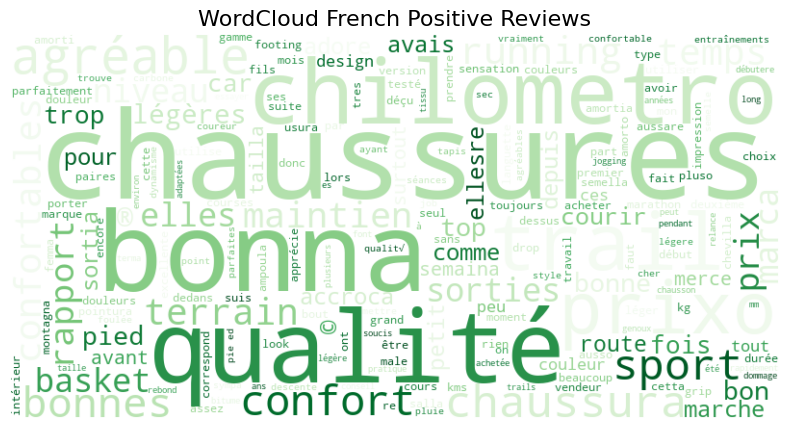

In [107]:
plot_wordcloud(freq_pos_fr, "WordCloud French Positive Reviews", color="Greens")

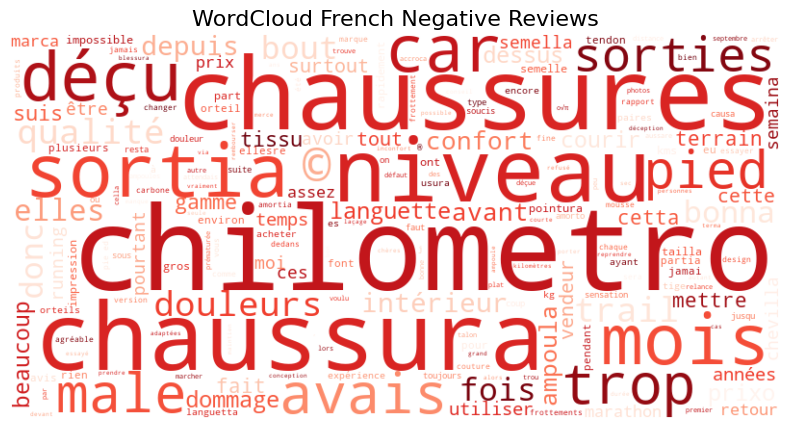

In [108]:
plot_wordcloud(freq_neg_fr, "WordCloud French Negative Reviews", color="Reds")

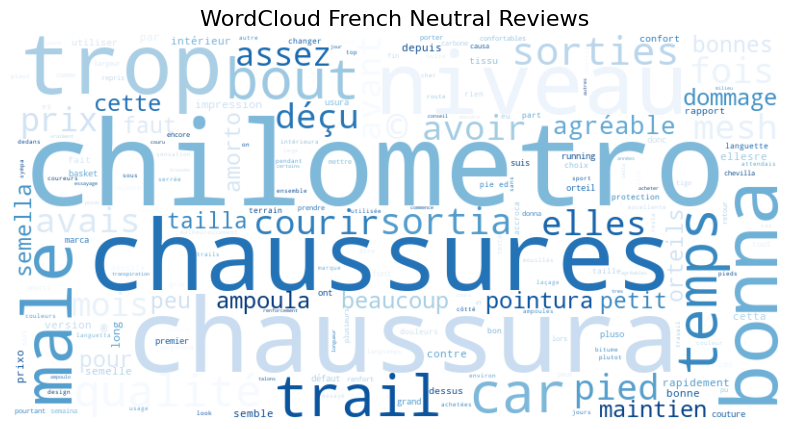

In [109]:
plot_wordcloud(freq_neu_fr, "WordCloud French Neutral Reviews", color="Blues")

In [110]:
# Convert frequency dictionaries into DataFrames
df_pos_freq_fr = pd.DataFrame(freq_pos_fr.items(), columns=["lemma", "freq_pos"])
df_neg_freq_fr = pd.DataFrame(freq_neg_fr.items(), columns=["lemma", "freq_neg"])
df_neu_freq_fr = pd.DataFrame(freq_neu_fr.items(), columns=["lemma", "freq_neu"])

In [111]:
# Merge the 3 DataFrames on lemma
df_freq_fr = df_pos_freq_fr.merge(df_neg_freq_fr, on="lemma", how="outer")
df_freq_fr = df_freq_fr.merge(df_neu_freq_fr, on="lemma", how="outer")

In [112]:
# Replace NaNs with 0 and cast to integers
df_freq_fr.fillna(0, inplace=True)
df_freq_fr[["freq_pos", "freq_neg", "freq_neu"]] = df_freq_fr[["freq_pos", "freq_neg", "freq_neu"]].astype(int)

In [113]:
# Add total frequency column
df_freq_fr["total"] = df_freq_fr["freq_pos"] + df_freq_fr["freq_neg"] + df_freq_fr["freq_neu"]

In [114]:
# Normalize frequencies by number of reviews in each sentiment group
n_pos_fr = len(df_pos_fr)
n_neg_fr = len(df_neg_fr)
n_neu_fr = len(df_neu_fr)

In [115]:
df_freq_fr["freq_pos_norm"] = df_freq_fr["freq_pos"] / n_pos_fr
df_freq_fr["freq_neg_norm"] = df_freq_fr["freq_neg"] / n_neg_fr
df_freq_fr["freq_neu_norm"] = df_freq_fr["freq_neu"] / n_neu_fr

In [116]:
# Overall normalized frequency (mean of normalized freqs)
df_freq_fr["freq_normalized"] = (
    df_freq_fr["freq_pos_norm"] + df_freq_fr["freq_neg_norm"] + df_freq_fr["freq_neu_norm"]
) / 3

# Sort by total raw frequency
df_freq_fr = df_freq_fr.sort_values(by="total", ascending=False).reset_index(drop=True)

# Display top 20 nouns with frequency
print(df_freq_fr.head(20))

           lemma  freq_pos  freq_neg  freq_neu  total  freq_pos_norm  \
0     chaussures       785        94        46    925       0.154863   
1          bonna       651        25        28    704       0.128428   
2     chilometro       405       131        69    605       0.079897   
3        qualité       531        31        18    580       0.104754   
4          trail       319        31        21    371       0.062932   
5      chaussura       214        84        51    349       0.042217   
6          prixo       312        19         9    340       0.061551   
7       agréable       235         7        11    253       0.046360   
8        confort       196        21         8    225       0.038666   
9         niveau       115        72        36    223       0.022687   
10         sport       207         4         4    215       0.040836   
11        bonnes       187         4        10    201       0.036891   
12         temps       147        14        20    181       0.02

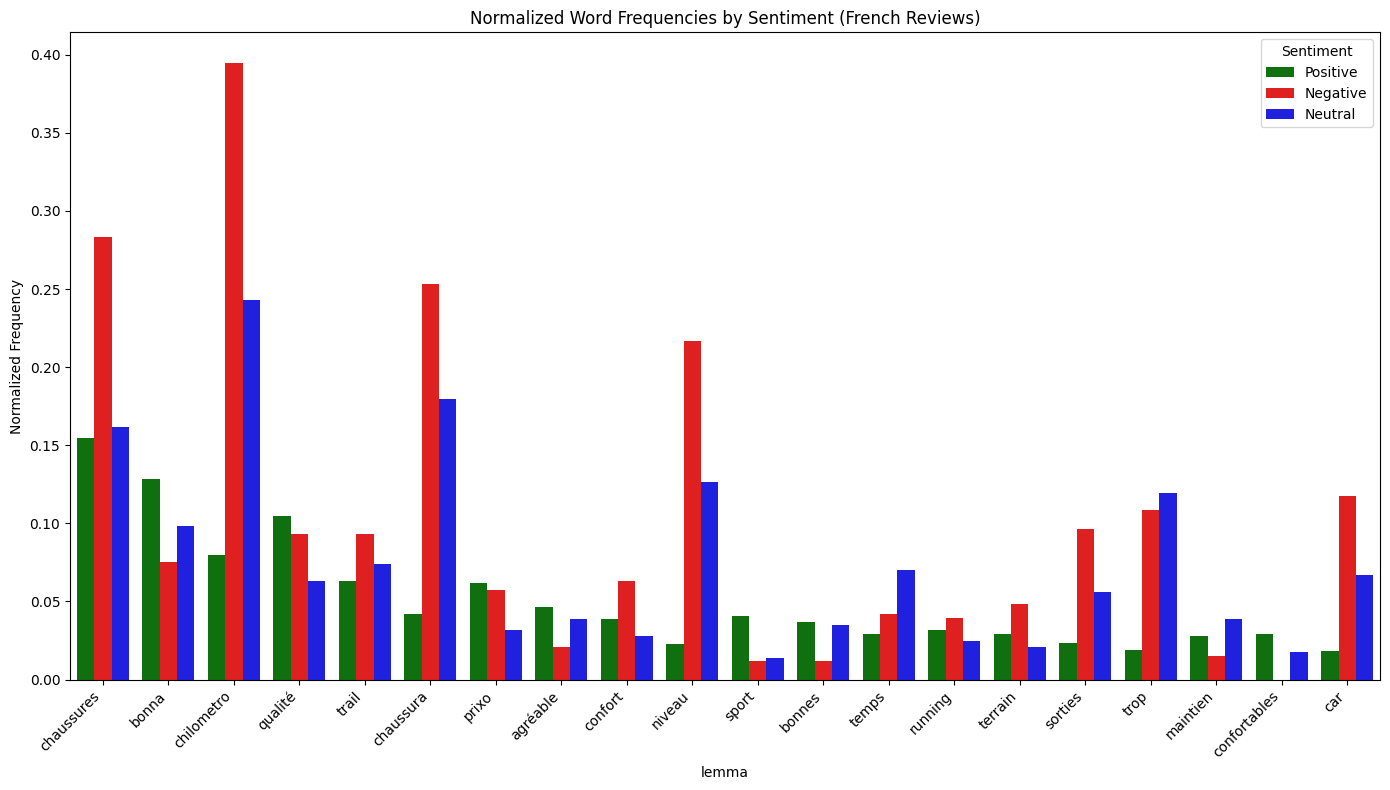

In [117]:
# Select top N lemmas to visualize
top_n = 20

# Select top lemmas from the French frequency DataFrame
top_lemmas_fr = df_freq_fr.head(top_n)

# Melt the DataFrame to long format for seaborn
df_melted_fr = top_lemmas_fr.melt(
    id_vars="lemma",
    value_vars=["freq_pos_norm", "freq_neg_norm", "freq_neu_norm"],
    var_name="Sentiment",
    value_name="Normalized Frequency"
)

# Rename columns for readability
df_melted_fr["Sentiment"] = df_melted_fr["Sentiment"].replace({
    "freq_pos_norm": "Positive",
    "freq_neg_norm": "Negative",
    "freq_neu_norm": "Neutral"
})

# Plot grouped barplot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_melted_fr,
    x="lemma",
    y="Normalized Frequency",
    hue="Sentiment",
    palette={"Positive": "green", "Negative": "red", "Neutral": "blue"}
)
plt.title("Normalized Word Frequencies by Sentiment (French Reviews)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Sentiment")
plt.show()

<a class="anchor" id="8.3">

## 8.3 English Dataset
    
</a>

In [118]:
# Load the English SpaCy model
nlp_en = spacy.load("en_core_web_md")

In [119]:
# Filter the English reviews
df_en = df[df["Language_review"] == "en"].drop(columns=["Language_review"])
print("Dataset dimension:", df_en.shape)

Dataset dimension: (8465, 31)


In [120]:
# Extract noun lemmas from reviews
def extract_substantives(texts, excluded_words=None):
    nouns = []
    for doc in nlp_en.pipe(texts, disable=["ner", "parser"]):
        for token in doc:
            if token.pos_ == "NOUN":
                lemma = token.lemma_.lower()
                if excluded_words and lemma in excluded_words:
                    continue
                nouns.append(lemma)
    return Counter(nouns)

In [121]:
# Define general nouns to exclude because they don't add value to the analysis
stop_nouns_en = [
    "shoe", "shoes", "model", "product", "client", "store", 
    "pair", "article", "purchase", "use", "bit"]

In [122]:
# Split by sentiment
df_pos_en = df_en[df_en["sentiment_label"] == "Positive"]
df_neg_en = df_en[df_en["sentiment_label"] == "Negative"]
df_neu_en = df_en[df_en["sentiment_label"] == "Neutral"]

# Review counts for normalization
n_pos_en = len(df_pos_en)
n_neg_en = len(df_neg_en)
n_neu_en = len(df_neu_en)

# Compute noun frequencies per sentiment
freq_pos_en = extract_substantives(df_pos_en["Full_Review"].dropna(), excluded_words=stop_nouns_en)
freq_neg_en = extract_substantives(df_neg_en["Full_Review"].dropna(), excluded_words=stop_nouns_en)
freq_neu_en = extract_substantives(df_neu_en["Full_Review"].dropna(), excluded_words=stop_nouns_en)


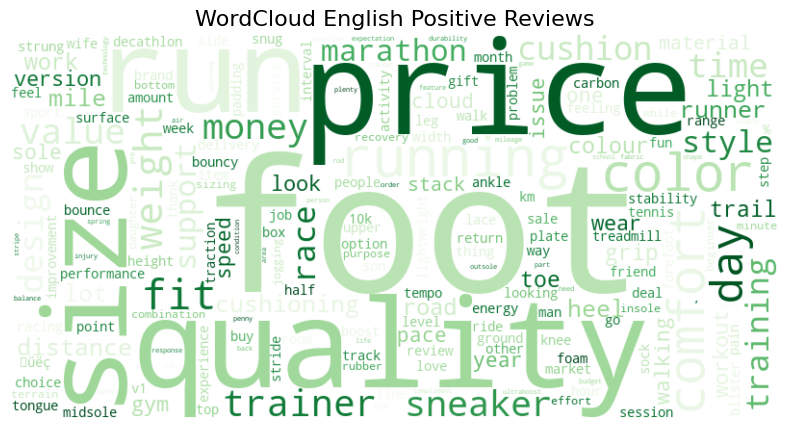

In [123]:
plot_wordcloud(freq_pos_en, "WordCloud English Positive Reviews", color="Greens")

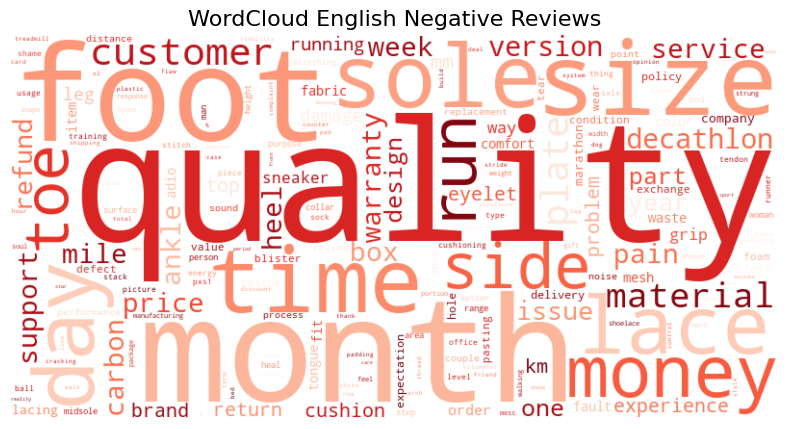

In [124]:
plot_wordcloud(freq_neg_en, "WordCloud English Negative Reviews", color="Reds")

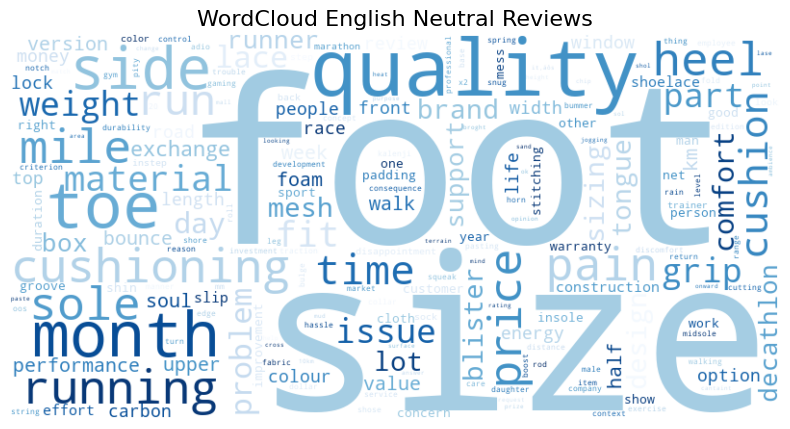

In [125]:
plot_wordcloud(freq_neu_en, "WordCloud English Neutral Reviews", color="Blues")

In [126]:
# Convert to DataFrames
df_pos_freq_en = pd.DataFrame(freq_pos_en.items(), columns=["lemma", "freq_pos"])
df_neg_freq_en = pd.DataFrame(freq_neg_en.items(), columns=["lemma", "freq_neg"])
df_neu_freq_en = pd.DataFrame(freq_neu_en.items(), columns=["lemma", "freq_neu"])

# Merge all into a single DataFrame
df_freq_en = df_pos_freq_en.merge(df_neg_freq_en, on="lemma", how="outer")
df_freq_en = df_freq_en.merge(df_neu_freq_en, on="lemma", how="outer")

# Clean up and calculate totals
df_freq_en.fillna(0, inplace=True)
df_freq_en[["freq_pos", "freq_neg", "freq_neu"]] = df_freq_en[["freq_pos", "freq_neg", "freq_neu"]].astype(int)
df_freq_en["total"] = df_freq_en["freq_pos"] + df_freq_en["freq_neg"] + df_freq_en["freq_neu"]

# Normalize frequencies
df_freq_en["freq_pos_norm"] = df_freq_en["freq_pos"] / n_pos_en
df_freq_en["freq_neg_norm"] = df_freq_en["freq_neg"] / n_neg_en
df_freq_en["freq_neu_norm"] = df_freq_en["freq_neu"] / n_neu_en
df_freq_en["freq_normalized"] = (
    df_freq_en["freq_pos_norm"] + df_freq_en["freq_neg_norm"] + df_freq_en["freq_neu_norm"]
) / 3

# Sort by raw frequency
df_freq_en = df_freq_en.sort_values(by="total", ascending=False).reset_index(drop=True)

# Top 20 lemmas (raw counts)
print(df_freq_en.head(20))

      lemma  freq_pos  freq_neg  freq_neu  total  freq_pos_norm  \
0   quality       708       203        37    948       0.095354   
1      foot       752       120        51    923       0.101279   
2     price       711        32        16    759       0.095758   
3      size       624        77        45    746       0.084040   
4       run       640        41        14    695       0.086195   
5   running       607        17        17    641       0.081751   
6     color       551        12         3    566       0.074209   
7   comfort       510        12         8    530       0.068687   
8       day       389        52         8    449       0.052391   
9       fit       341        12        12    365       0.045926   
10   weight       304         5        11    320       0.040943   
11     time       227        61        13    301       0.030572   
12    money       248        42         4    294       0.033401   
13  trainer       262         3         3    268       0.03528

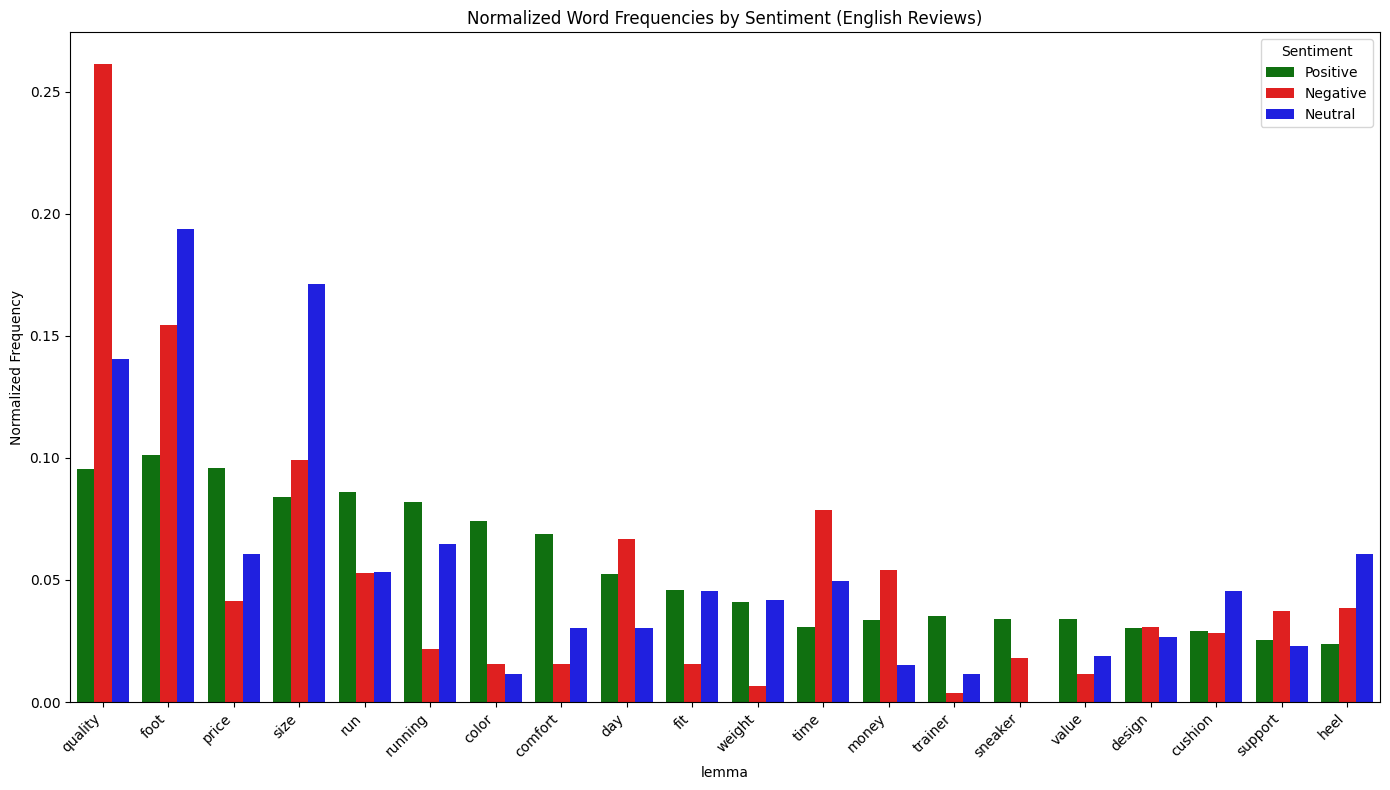

In [127]:
# Select top N lemmas
top_n = 20
top_lemmas_en = df_freq_en.head(top_n)

# Melt DataFrame to long format
df_melted_en = top_lemmas_en.melt(
    id_vars="lemma",
    value_vars=["freq_pos_norm", "freq_neg_norm", "freq_neu_norm"],
    var_name="Sentiment",
    value_name="Normalized Frequency"
)

# Rename columns
df_melted_en["Sentiment"] = df_melted_en["Sentiment"].replace({
    "freq_pos_norm": "Positive",
    "freq_neg_norm": "Negative",
    "freq_neu_norm": "Neutral"
})

# Plot grouped barplot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_melted_en,
    x="lemma",
    y="Normalized Frequency",
    hue="Sentiment",
    palette={"Positive": "green", "Negative": "red", "Neutral": "blue"}
)
plt.title("Normalized Word Frequencies by Sentiment (English Reviews)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title="Sentiment")
plt.show()

In [163]:
# Save df dataset (no preprocessing such as punctuation etc.)
output_path_df_final = "/Users/giuliabovenga/Desktop/Thesis/Preprocessed Dataset/DF Final Dataset.csv"

# Remove if existent
if os.path.exists(output_path_df_final):
    os.remove(output_path_df_final)

# Export the CSV
df.to_csv(output_path_df_final, 
          index=False, encoding="utf-8-sig")

<a class="anchor" id="9">

# 9. Dataset Preprocessing
    
</a>

In this chapter, I will create a copy of the original clean dataset (df) and perform different cleaning operations, based on the criteria the different algorithms need to work. For instance, for the BERT algorithm the NLP cleaning will be lighter as it is an algorithm trained on "dirty" datasets.

`df_bert` is the dataset used in this section. 

In [128]:
df_bert = df.copy()

In [129]:
# Check
output_path_bert = "/Users/giuliabovenga/Desktop/Thesis/Preprocessed Dataset/Dataset Bert Dirty.csv"

if os.path.exists(output_path_bert):
    os.remove(output_path_bert)

df_bert.to_csv(output_path_bert, 
          index=False, encoding="utf-8-sig")

In [130]:
df["Language_review"].value_counts()

Language_review
en         8465
it         5926
fr         5685
vi         1431
es         1025
pl          711
tr          539
so          403
pt          377
de          339
ro          323
ca          296
hu          271
tl          262
af          201
no          184
id          160
cs          154
da          143
nl          118
sq          106
sk           99
fi           77
lt           72
unknown      72
hr           52
sv           48
sl           40
el           40
cy           37
et           29
lv           28
sw           20
Name: count, dtype: int64

In [131]:
# Drop the is_discounted
if 'is_discounted' in df_bert.columns:
    df_bert.drop(columns=['is_discounted'], inplace=True)

# Fill all NaN values with a placeholder text
df_bert.fillna("Unknown", inplace=True)

# Filter only reviews written in Italian, English and French
df_bert = df_bert[df_bert['Language_review'].isin(['it', 'en', 'fr'])].reset_index(drop=True)

print("Filtered dataset shape:", df_bert.shape)
print("Languages in dataset:\n", df_bert['Language_review'].value_counts())


Filtered dataset shape: (20076, 31)
Languages in dataset:
 Language_review
en    8465
it    5926
fr    5685
Name: count, dtype: int64


/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_30985/1369512746.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bert.fillna("Unknown", inplace=True)
/var/folders/jb/nvy3v4hn4mv7g_jtj04zp7pc0000gn/T/ipykernel_30985/1369512746.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_bert.fillna("Unknown", inplace=True)


<a class="anchor" id="9.1">

## 9.1 Preprocessing | Sentence BERT and HDBSCAN/BERTopic
    
</a>

In [132]:
# Keep only necessary columns
df_bert = df_bert[['Full_Review', 'sentiment_label', 'Language_review', 'Rating']]

# Drop rows with missing or empty reviews
df_bert = df_bert[df_bert['Full_Review'].notna() & df_bert['Full_Review'].str.strip().ne("")]

In [133]:
# Clean the text
def clean_text(text):
    text = str(text).lower().strip()              # lowercase + strip whitespace
    text = text.replace("\n", " ").replace("\r", "")
    text = text.replace("'", "").replace('"', "") # remove quotes
    return text

df_bert['Clean_Review'] = df_bert['Full_Review'].apply(clean_text)


In [134]:
# Filter reviews with equal less than 1 word
short_reviews = df_bert[df_bert['Clean_Review'].str.split().str.len() <= 2]

# Check the sentiment distribution
sentiment_counts = short_reviews['sentiment_label'].value_counts(normalize=True) * 100
print(sentiment_counts.round(2))


sentiment_label
Positive    95.50
Negative     2.34
Neutral      2.16
Name: proportion, dtype: float64


In [135]:
# Total number of reviews in the dataset
total_reviews = df_bert.shape[0]
num_short_reviews = short_reviews.shape[0]
print((num_short_reviews / total_reviews) * 100)

5.7531380753138075


In [136]:
df_bert[df_bert['Clean_Review'].str.split().str.len() <= 3]

Full_Review sentiment_label  \
13                                        comode Leggere        Positive   
15                                   Scarpe morbidissime        Positive   
18                                         ottimo ottimo        Positive   
20                                     Sono felicissimo.        Positive   
25                                             Consiglio        Positive   
...                                                  ...             ...   
12802                                            Top Top        Positive   
12804                                    parfait parfait        Positive   
12811                          Perfette come descrizione        Positive   
12822                                    Parfait Parfait        Positive   
16580  Great Great......................................        Positive   

      Language_review  Rating  \
13                 it       4   
15                 it       5   
18                 it       5   
20                 it       5   
25                 it       5   
...               ...     ...   
12802              en       5   
12804              fr       5   
12811              it       5   
12822              fr       5   
16580              en       5   

                                            Clean_Review  
13                                        comode leggere  
15                                   scarpe morbidissime  
18                                         ottimo ottimo  
20                                     sono felicissimo.  
25                                             consiglio  
...                                                  ...  
12802                                            top top  
12804                                    parfait parfait  
12811                          perfette come descrizione  
12822                                    parfait parfait  
16580  great great......................................  

[1797 rows x 5 columns]

In [137]:
# Drop rows where Clean_Review has 1 word or less
df_bert = df_bert[df_bert['Clean_Review'].str.split().str.len() > 1].reset_index(drop=True)

### Preprocessing Italian Dataset

- Text cleaning
- Removal of scraping errors
- Accurate lemmatization of only significant nouns
- Removal of Italian stopwords

In [138]:
def light_cleaning(text):
    text = ftfy.fix_text(str(text))  # fix encoding errors
    text = text.lower()
    text = text.replace("_x000D_", " ")
    text = re.sub(r'http\S+', '', text)  # remove URL
    text = re.sub(r'\s+', ' ', text)  # multiple spaces 
    text = re.sub(r'[^\w\sàèéìòùüç]', '', text)  # remove punctuation but leaves accents
    return text.strip()


In [139]:
df_ita = df_bert[df_bert['Language_review'] == 'it'].copy()
tqdm.pandas(desc="Pulizia leggera recensioni italiane")
df_ita["Clean_Review"] = df_ita["Full_Review"].progress_apply(light_cleaning)
df_bert.update(df_ita[["Clean_Review"]])


Pulizia leggera recensioni italiane: 100%|██████████| 5807/5807 [00:00<00:00, 27677.99it/s]


In [140]:
df_ita.head(50)

Full_Review sentiment_label  \
0   per correre tranquilli scarpe per running non ...        Positive   
1   Ottimo prodotto per rapporto qualità prezzo. C...        Positive   
2   Una scarpa eccellente!_x000D_ Acquisto azzecca...        Positive   
3         Le uso quasi tutti i giorni per passeggiare        Positive   
4     ottimo scarpe da ginnastica ad un prezzo ottimo        Positive   
5   Ho ripreso a correre, con queste mi trovo bene...        Positive   
6   Per attivitàfisica a livello amatoriale Le uso...        Positive   
7   comode Dal prezzo contenuto ma molto comode e ...        Positive   
8   Comode e pratiche Nulla da dire. per il prezzo...        Positive   
9             ottime ottime (rapporto qualità prezzo)        Positive   
10                Belle e comode qualità prezzo buono        Positive   
11  ottimo prodotto (anche senza considerare il pr...        Positive   
12  rapporto qualità prezzo imbattibile. le ho acq...        Positive   
13                                     comode Leggere        Positive   
14                        davvero comode belle scarpe        Positive   
15                                Scarpe morbidissime        Positive   
16               Buon prodotto leggero e confortevole        Positive   
17  uso palestra usate per sala pesi in palestra q...        Positive   
18                                      ottimo ottimo        Positive   
19                            ottime leggere e comode        Positive   
20                                  Sono felicissimo.        Positive   
21                         Ottima scarpa Prezzo super        Positive   
22               La scarpa giusta per le mie attività        Positive   
23  Ottime scarpe ad un prezzo eccezionale, comode...        Positive   
24      Molto consigliate per corse di lunga distanza        Positive   
25  Comodissime e leggere, molto apprezzate da mio...        Positive   
26  scarpa comoda scarpa comoda ed efficiente spec...        Positive   
27            Per quello che costano sono eccezionali        Positive   
28                       Buon rapporto qualità/prezzo         Neutral   
29  buone buon prodotto per che esce in giro a cam...        Positive   
30                     Rapporto qualità prezzo ottimo        Positive   
31  Ottima scarpa qualità/prezzo. Comprate per il ...        Positive   
32  Comoda, leggera e fresca..adatta per le cammin...        Positive   
33  Leggera e confortevole. Ottimo rapporto qualit...        Positive   
34  mio figlio ne ha tre paia diverse: un paio per...        Positive   
35  Calzano strette dai lati, però comode e tengon...        Positive   
36     Ottima, comoda e rapporto qualità/prezzo buono        Positive   
37                                scarpe molto comode        Positive   
38     Buon prodotto, ottimo rapporto qualità prezzo.        Positive   
39             scarpe sono strette e spaccano i piedi        Negative   
40                        Soddisfatto ottimo prodotto        Positive   
41  Scarpa comoda per attivitàdi leggera intensità...        Positive   
42    Perfetta per la palestra in relazione al prezzo        Positive   
43                     Ottimo rapporto qualità/prezzo        Positive   
44                          prodotto di buona qualità        Positive   
45                                Ottime x lo sport !        Positive   
46  Buone per il fitness Le uso in palestra da mes...        Positive   
47  Scarpe di ottima fattura e ottimo rapporto qua...        Positive   
48  scarpe running Le uso tutti i giorni per andar...        Positive   
49                                    Ottimo prodotto        Positive   

   Language_review  Rating                                       Clean_Review  
0               it       5  per correre tranquilli scarpe per running non ...  
1               it       4  ottimo prodotto per rapporto qualità prezzo co...  
2               it       5  una scarpa eccellente_x000d_ acquisto azzeccat... 

### Preprocessing French Dataset

In [141]:
# Load French spaCy model
nlp_fr = spacy.load("fr_core_news_sm")

In [142]:
# Define lightweight cleaning function for French reviews
def light_cleaning_fr(text):
    text = ftfy.fix_text(str(text))  # fix encoding issues
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'\s+', ' ', text)  # remove multiple spaces
    text = re.sub(r'[^\w\sàâçéèêëîïôûùüÿñæœ]', '', text)  # remove punctuation (keep accented chars)
    return text.strip()

In [143]:
# Filter French reviews
df_fr = df_bert[df_bert['Language_review'] == 'fr'].copy()

# Apply light cleaning to French text
tqdm.pandas(desc="Light cleaning French reviews")
df_fr["Clean_Review"] = df_fr["Full_Review"].progress_apply(light_cleaning_fr)

# Update the original df_bert with the cleaned French reviews
df_bert.update(df_fr[["Clean_Review"]])

Light cleaning French reviews: 100%|██████████| 5663/5663 [00:00<00:00, 14677.49it/s]


In [144]:
df_fr.sample(50)

Full_Review sentiment_label  \
9418   Bonne decouverte Suite à ma reprise de l athle...        Positive   
9461   Un peu cher pour Un peu cher pour la marque dé...        Positive   
5575   Chaussures confortable pour la Chaussures conf...        Positive   
8022   Ces chaussures correspondent à Ces chaussures ...        Positive   
4889   je l'utilise tous les je l'utilise tous les jo...        Positive   
7468   Qualité Chaussures niveau acroche pas vraiment...        Negative   
10669  Bonne chaussure pour débuter Bonne chaussure p...        Positive   
8235                   Très bon produit Très bon produit        Positive   
6278   Produit parfait surtout en Produit parfait sur...        Positive   
7603   impeccable pour le trail impeccable pour le trail        Positive   
4598            Baskets footing Bon rapport qualité/prix        Positive   
5032                  Rien à dire de Rien à dire de plus        Positive   
9361   Amazing √Ä conseiller aux pied fin,très bon so...        Positive   
4856   Bonne chaussure mais a force devant s'use de b...        Positive   
8131   Chaussures au rapport qualité Chaussures au ra...        Positive   
6092   Très bien pour la Très bien pour la marche jou...        Positive   
2856   Très bonne chaussures pas chère et confortable...        Positive   
12379                              üëçüëç Best product        Positive   
9325   Confortable pour la marche Confortable pour la...        Positive   
1243                                  Excellent products        Positive   
1638   Utilisation en intérieur. Bon compromis Utilis...        Positive   
5280   ma femme n'a pas ma femme n'a pas aimé l'amort...        Positive   
11916  Chaussure confortable Chaussures lég√®res et r...        Positive   
7343   Excellente chaussures d'entraînement qui Excel...        Positive   
7943   Très bon rapport qualité prix Utilisé pour la ...        Positive   
7114   Très bon produit conforme Très bon produit con...        Positive   
9271   Chaussures trail utilisées depuis Chaussures t...        Positive   
6835   Très souple et très Très souple et très légère...        Positive   
7275   Bonne accroche Aucune glissade même sur de la ...        Positive   
4922   Baskets polyvalentes Achetées au dernier momen...        Positive   
5912   Paire de basket qui Paire de basket qui satisf...        Positive   
6523   Mes 1eres kiprun Arrivées sous le sapin à No√´...        Positive   
4658                                     Parfait Parfait        Positive   
7703   J'avais déj à les XT6 J'avais déj à les XT6 bo...        Positive   
1853                       Pas terrible Produit à revoir        Negative   
4388   Basket Basket souple bon maintien tres belle c...        Positive   
7910   Polyvalence, adhérence et qualité Cela fait ma...        Positive   
9209   Exellente chaussure de trail Ce modèle est top...        Positive   
4850   Bon rapport qualité/prix Bon rapport qualité/prix        Positive   
8695   Glisse facilement sur sol Glisse facilement su...         Neutral   
8170   Fais le taf pour Fais le taf pour du trail. Ma...        Positive   
3645                                Excellent experience        Positive   
5102   chaussures légères et flexibles chaussures lég...        Positive   
5910   Je ne les ai Je ne les ai pas assez portées po...        Positive   
4370   Très bien Parfait pour des chaussures occasion...        Positive   
8221   Chaussure confortable Chaussures très conforta...        Positive   
7434   Chaussure trail Super look. Très bonne accroch...        Positive   
9230   Super produit ! Je trouve cette paire vraiment...        Positive   
4757   Baskets pour sport et quotidien C'est la 2ème ...        Positive   
6842   c'est mieux confortable peut c'est mieux confo...        Positive   

      Language_review  Rating  \
9418               fr       5   
9461               fr       5   
5575               fr       4   
8022               fr       5   
488

### Preprocessing English Dataset

In [145]:
# Load English spaCy model
nlp_en = spacy.load("en_core_web_sm")

In [146]:
# Define lightweight cleaning function for English reviews
def light_cleaning_en(text):
    text = ftfy.fix_text(str(text))  # fix encoding issues
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text.strip()


In [ ]:
# Filter English reviews
df_en = df_bert[df_bert['Language_review'] == 'en'].copy()

# Apply light cleaning to English text
tqdm.pandas(desc="Light cleaning English reviews")
df_en["Clean_Review"] = df_en["Full_Review"].progress_apply(light_cleaning_en)

# Update the original df_bert with the cleaned English reviews
df_bert.update(df_en[["Clean_Review"]])

Light cleaning English reviews: 100%|██████████| 8402/8402 [00:00<00:00, 43273.38it/s]


In [148]:
df_en.head(50)

Full_Review sentiment_label  \
130  BASTEREBBE DIRE CHE LE ABBIAMO RICOMPRATE PER ...        Positive   
273  SCARPE LEGGERE, TRASPIRANTI, LE STO USANDO TUT...        Positive   
409  SCARPE ECONOMICHE CHE FANNO IL LORO DOVERE! CO...        Positive   
421  I have used them for almost 6 months and the s...        Positive   
665                          Light weight Good product        Positive   
671  Right is okey but left leg shoe have an issue ...        Positive   
672      Comfortable Very nice running shoes i love it        Positive   
673  I used this shoes for six month. Shoes's sole ...        Negative   
674                                       Good product        Positive   
675  Worst shoes ever.. don't purchase it for runni...        Negative   
676         amaing product amazing quality and fitting        Positive   
677  the product is nice !!! Quality is good as exp...        Positive   
678                           Got damaged with a month        Negative   
679                    Good Shoes Excellent Shoes üëü        Positive   
680                                       Good Product        Positive   
681                                         Nice Shoes        Positive   
682                       Only shoes shape is not good        Positive   
683  Quality of product is not satisfactory accordi...        Negative   
684                            Nice Shoes Good looking        Positive   
685  Nice shoes, as expected, always go for the dec...        Positive   
687  The Kalenji JogFlow running shoes are a fantas...        Positive   
688                  Built with quality and perfection        Positive   
689  This was for my sister, i saw her wearing this...        Positive   
690                         insoles should be improved        Positive   
691  Very uncomfortable to wear and are not worth t...        Negative   
692                           Very nice nd comfortable        Positive   
693  This product is very bad experience üòî So ia...        Negative   
694                                     Very Nice shoe        Positive   
697                Most suitable for men and relaxable        Positive   
698       Good Quality I Will Recommend For Walking ..        Positive   
699  Product quality is as per expectation because ...        Positive   
700  Very very worst upper mesh quality got ripped ...        Negative   
701                               l liked this product        Positive   
702                   This shoes üëü made for running        Positive   
703  TOTAL MONEY WASTE....INDIAN BRAND BC THIS IS A...        Negative   
704  it's comfortable is so good and its totally fi...        Positive   
705  Bad quality after 1 month sole and uper mesh s...        Negative   
706                 Excellent Shoes , very Comfortable        Positive   
707                                     Great product.        Positive   
708  foot width looks like narrow. While walking fo...        Negative   
709                               cushioning is normal        Positive   
710  Damaged rt shoe.tear just above sole .I don't ...        Negative   
711                    Best for comfort walk and run .        Positive   
712  Excellent trainers Comfortable, stylish and gr...        Positive   
714  Top class shorts shoes for running and other s...        Positive   
715  Looking good but quality is not good. I am ver...        Negative   
716                                    Nice Shoes 1 no        Positive   
717                       Good quality and good to use        Positive   
718                                   Quality not good        Negative   
719                                     Very bed shoes        Negative   

    Language_review  Rating                                       Clean_Review  
130              en       5  basterebbe dire che le abbiamo ricomprate per ...  
273              en       4  scarpe leggere traspiranti le sto usando tutti...  
409              en      

### Save the final dataset

In [149]:
# Final check
print("Final dataset", df_bert.shape)
print(df_bert['sentiment_label'].value_counts())

Final dataset (19872, 5)
sentiment_label
Positive    17590
Negative     1305
Neutral       977
Name: count, dtype: int64


In [150]:
# Save final dataset 
output_path_bert_final = "/Users/giuliabovenga/Desktop/Thesis/Preprocessed Dataset/BERT Dataset.csv"

# Remove if existent
if os.path.exists(output_path_bert_final):
    os.remove(output_path_bert_final)

# Export the CSV
df_bert.to_csv(output_path_bert_final, 
          index=False, encoding="utf-8-sig")

### More visualizations

In [160]:
# Stopwords multilingua (IT, EN, FR)
from spacy.lang.it.stop_words import STOP_WORDS as STOP_IT
from spacy.lang.en.stop_words import STOP_WORDS as STOP_EN
from spacy.lang.fr.stop_words import STOP_WORDS as STOP_FR

multilang_stopwords = set(STOP_IT) | set(STOP_EN) | set(STOP_FR)

In [151]:
def plot_normalized_frequencies(freq_data, top_n=25, title=""):
    all_words = set()
    for freqs in freq_data.values():
        all_words.update(freqs.keys())

    # Select top N frequent words overall
    total_freq = Counter()
    for freqs in freq_data.values():
        total_freq.update(freqs)
    common_words = [word for word, _ in total_freq.most_common(top_n)]

    # Prepare data for plotting
    plot_data = []
    for sentiment, freqs in freq_data.items():
        for word in common_words:
            plot_data.append({
                "lemma": word,
                "Sentiment": sentiment,
                "Normalized Frequency": freqs.get(word, 0)
            })

    df_plot = pd.DataFrame(plot_data)

    # Define fixed color palette
    color_map = {
        "Positive": "#2ca02c",  # green
        "Negative": "#d62728",  # red
        "Neutral": "#1f77b4"    # blue
    }

    # Plot
    plt.figure(figsize=(18, 6))
    sns.barplot(
        data=df_plot,
        x="lemma",
        y="Normalized Frequency",
        hue="Sentiment",
        palette=color_map
    )
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()


In [154]:
def get_normalized_freq(df, sentiment_column, review_column):
    sentiments = df[sentiment_column].unique()
    freq_data = {}

    for sentiment in sentiments:
        texts = df[df[sentiment_column] == sentiment][review_column].dropna()
        all_words = " ".join(texts).split()
        filtered_words = [word for word in all_words if word not in multilang_stopwords]
        total = len(filtered_words)
        freq = Counter(filtered_words)
        norm_freq = {word: count / total for word, count in freq.items()}
        freq_data[sentiment] = norm_freq

    return freq_data


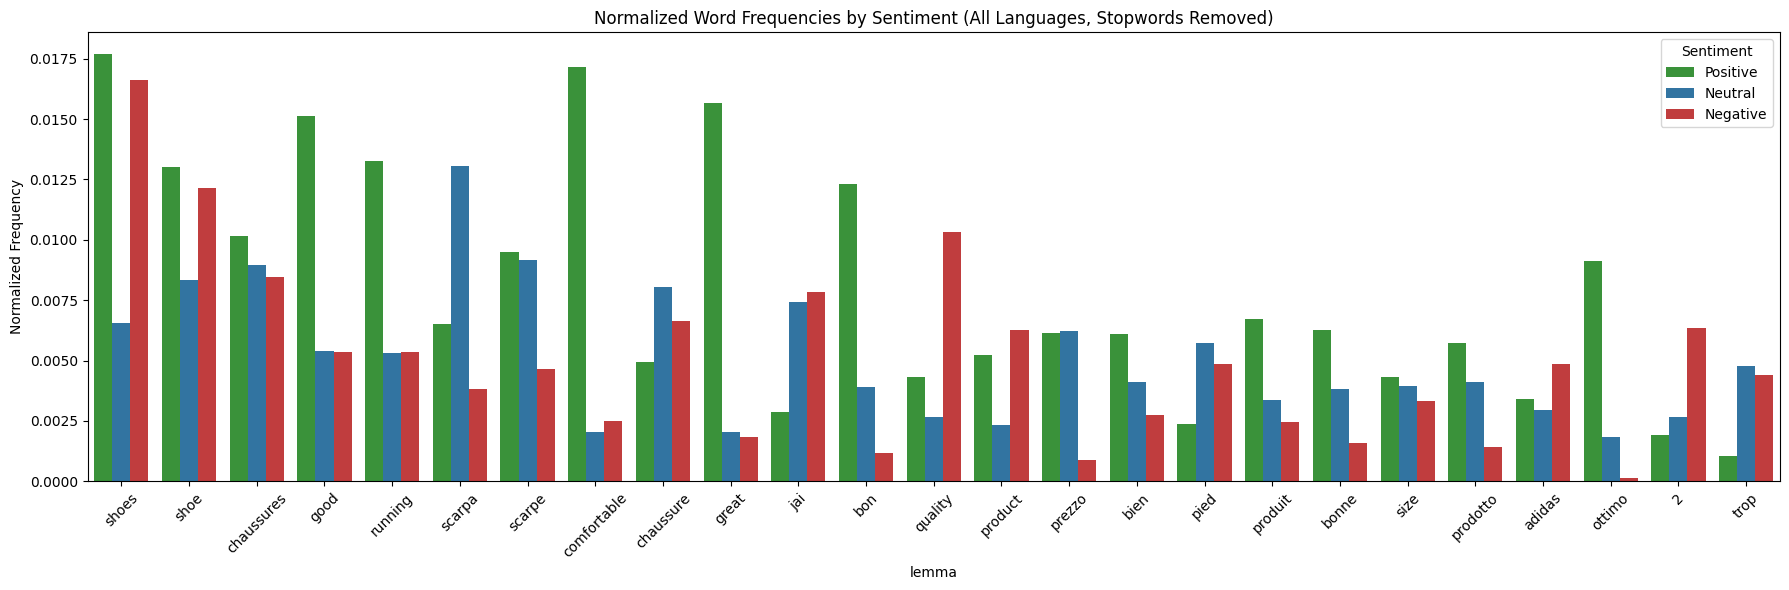

In [161]:
freq_all = get_normalized_freq(
    df=df_bert,
    sentiment_column="sentiment_label",
    review_column="Clean_Review"
)

plot_normalized_frequencies(freq_all, top_n=25, title="Normalized Word Frequencies by Sentiment (All Languages, Stopwords Removed)")


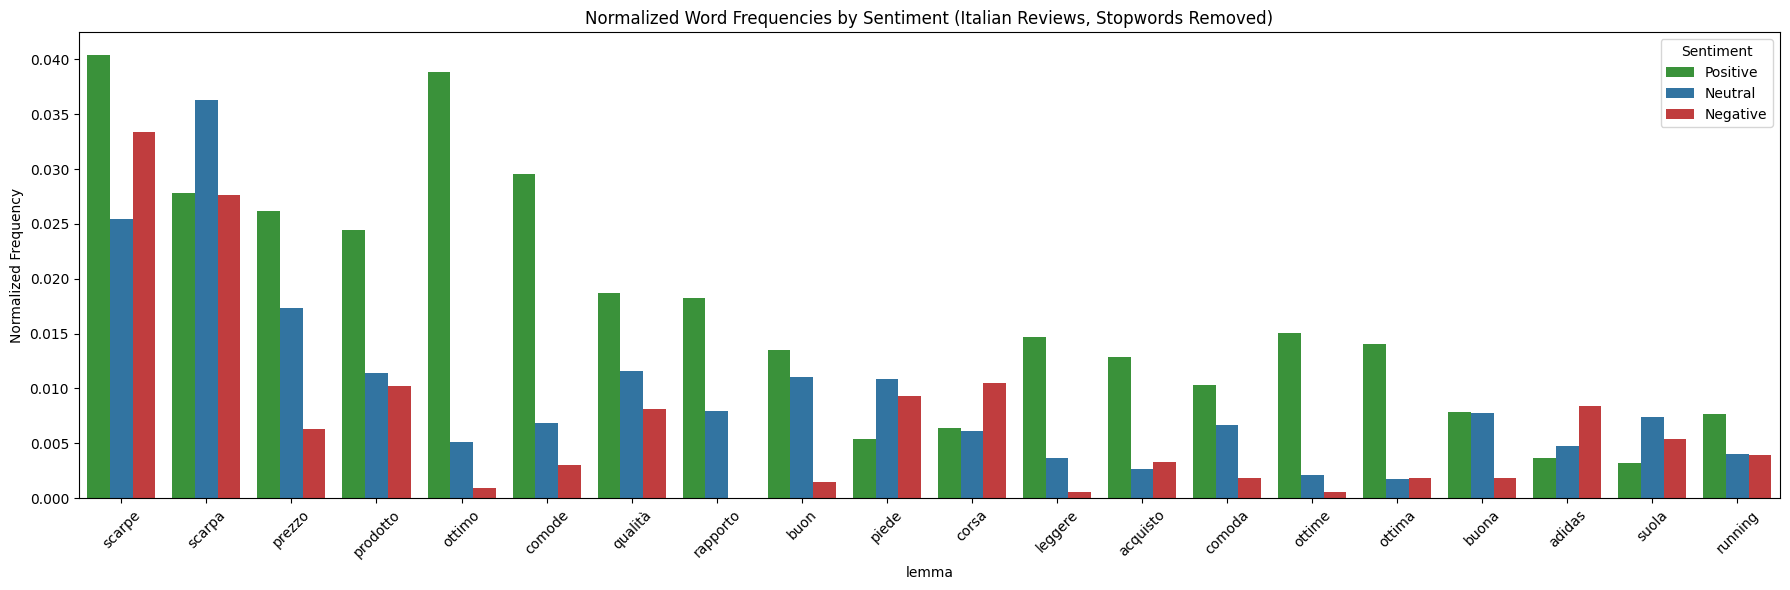

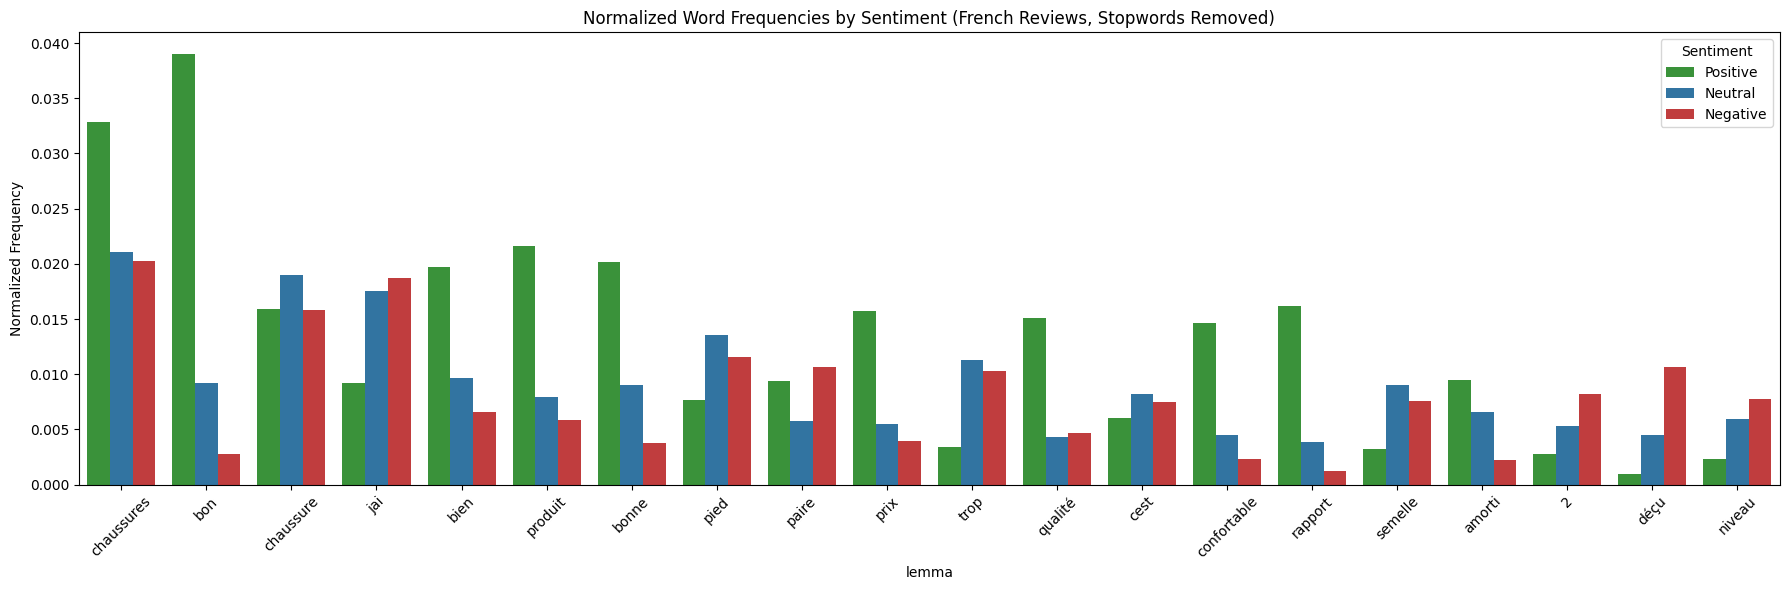

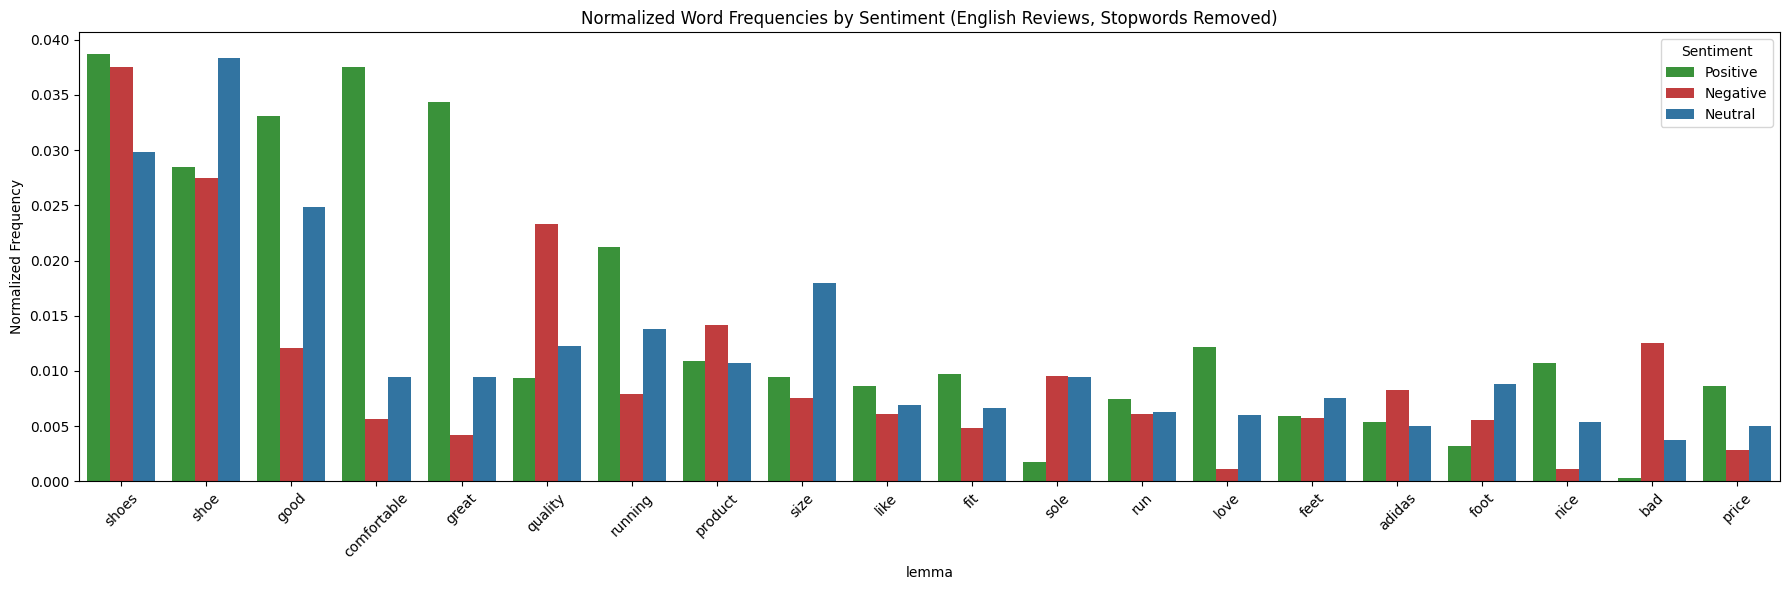

In [162]:
for lang_code, lang_name in zip(["it", "fr", "en"], ["Italian", "French", "English"]):
    df_lang = df_bert[df_bert["Language_review"] == lang_code]
    freq_lang = get_normalized_freq(
        df=df_lang,
        sentiment_column="sentiment_label",
        review_column="Clean_Review"
    )
    plot_normalized_frequencies(freq_lang, top_n=20, title=f"Normalized Word Frequencies by Sentiment ({lang_name} Reviews, Stopwords Removed)")
